# Fungi Classification Data Preprocess/Visualization

In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
from numpy import where
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# basic data info

In [2]:
# import data
data = pd.read_csv('mushrooms.csv')

In [3]:
data.shape

(8124, 23)

In [4]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
data.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# visualization preprocessing

In [8]:
# create list from categorical columns 
cat_cols = list(data.columns)
# remove target from categorical list for plot purposes
cat_cols.remove('class')

In [9]:
def plot_counts(df, cat, desc):
    fig, ax = plt.subplots()
    ax = sns.countplot(x=cat, data=df, palette="tab10")
    ax.set_title(f'{cat} counts {desc}')

C:\Users\root\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


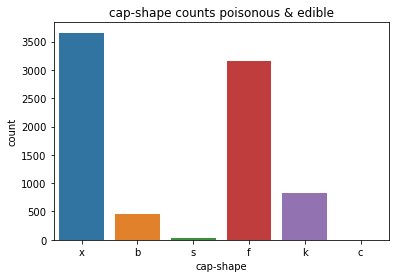

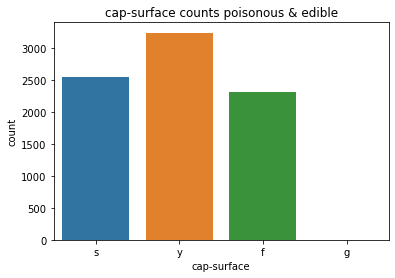

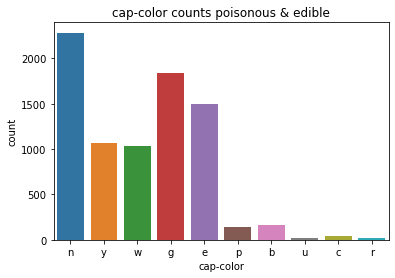

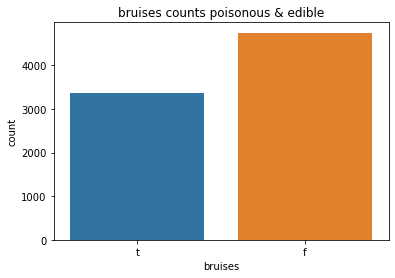

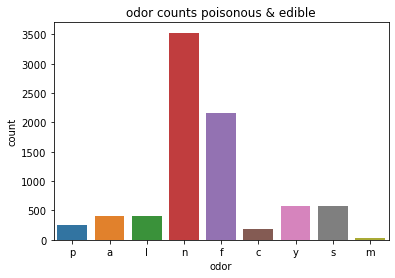

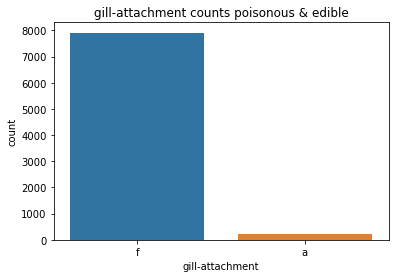

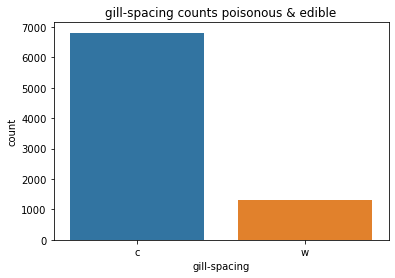

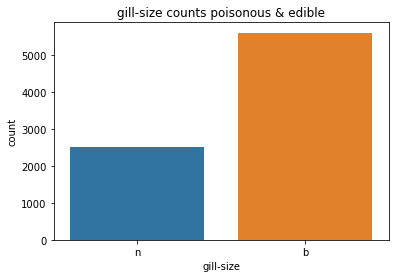

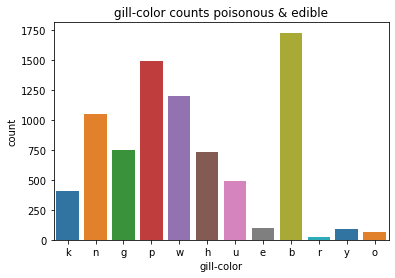

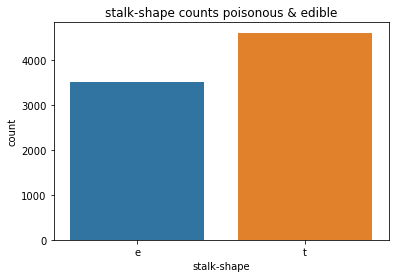

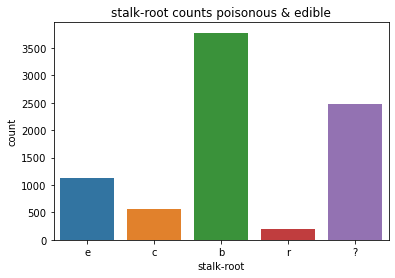

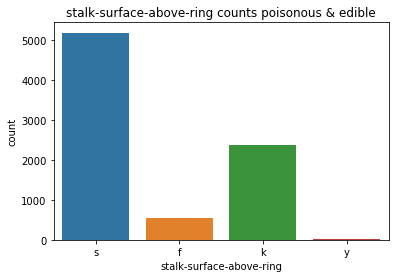

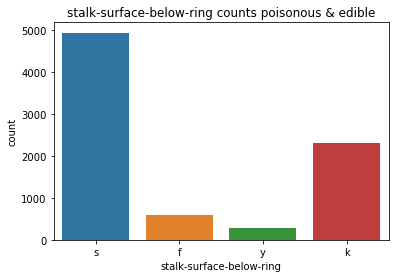

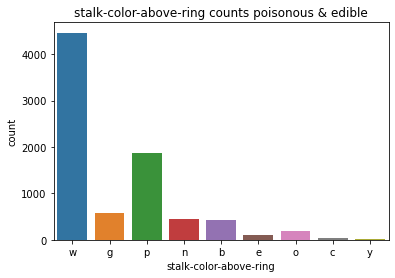

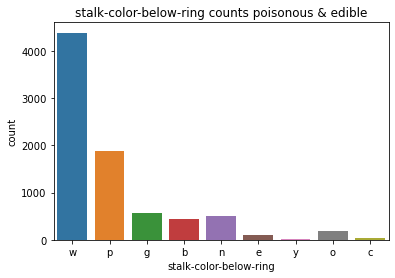

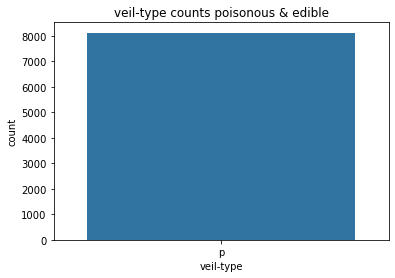

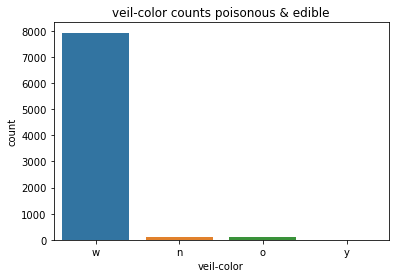

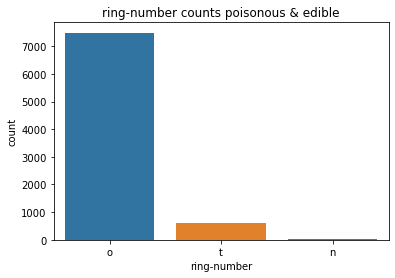

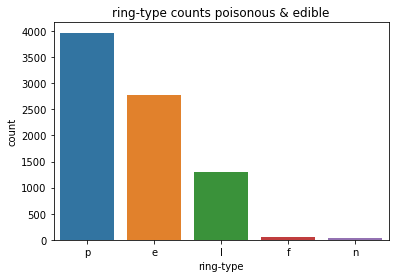

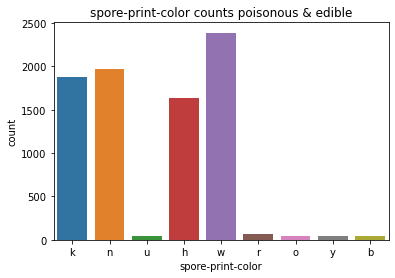

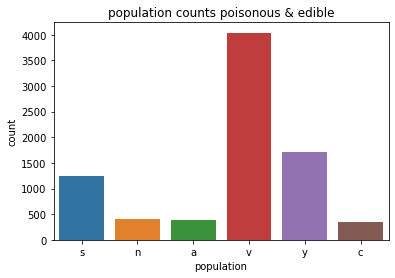

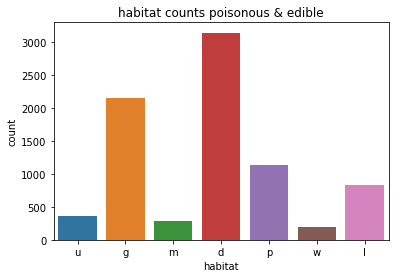

In [10]:
for x in cat_cols:
    plot_counts(data, x, 'poisonous & edible')

In [11]:
# function to plot all categorical variables against target
def plot_cats(df, cat, target):
    fig, ax = plt.subplots()
    ax = sns.countplot(x=cat, hue=target, data=df)
    ax.set_title(f'Count Poisonous VS Edible BY {cat}')

# visualizations

In [12]:
plt.close(fig='plt')
plt.cla()
plt.clf();

<Figure size 432x288 with 0 Axes>

C:\Users\root\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until


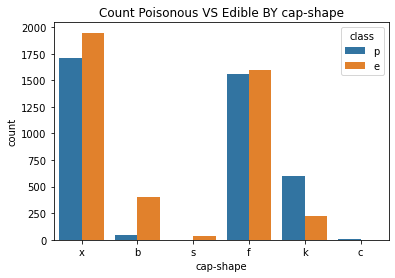

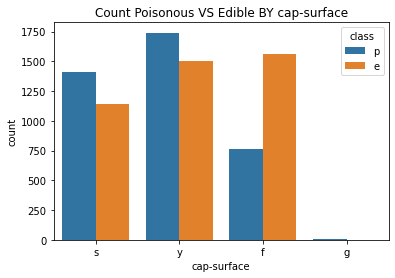

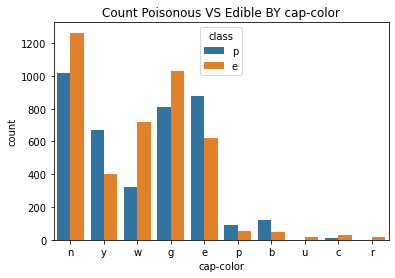

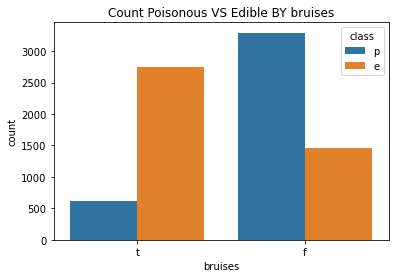

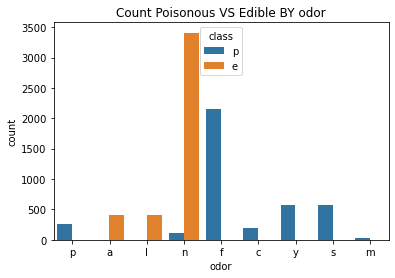

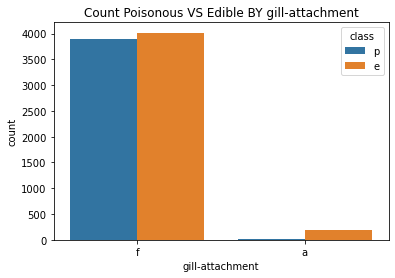

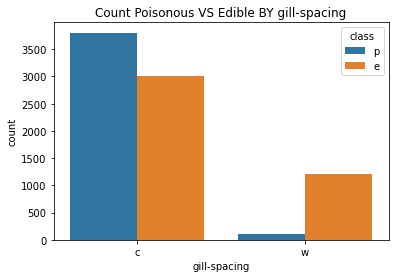

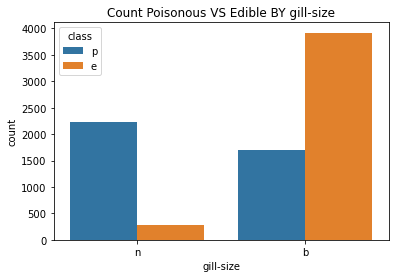

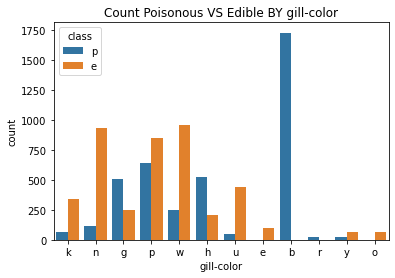

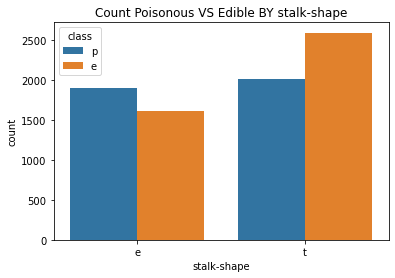

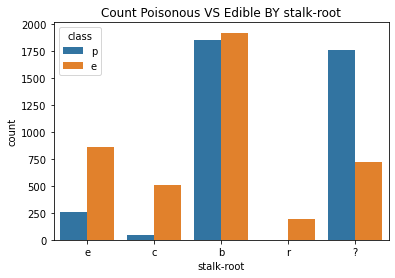

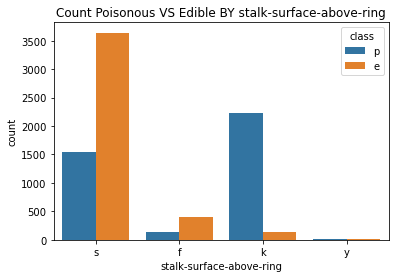

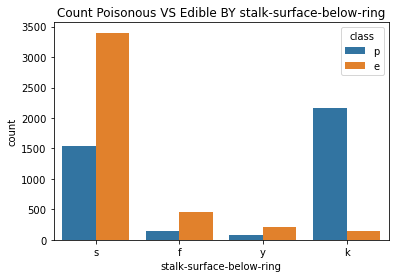

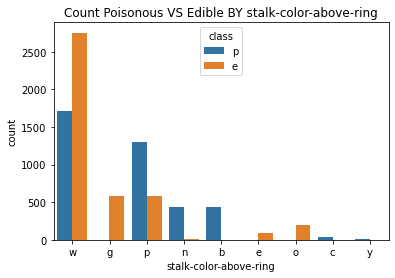

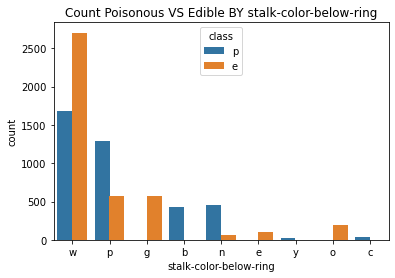

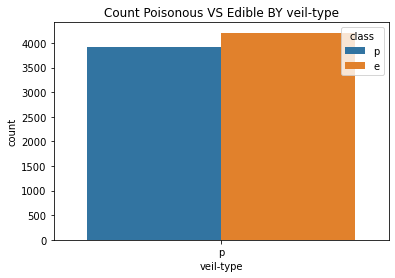

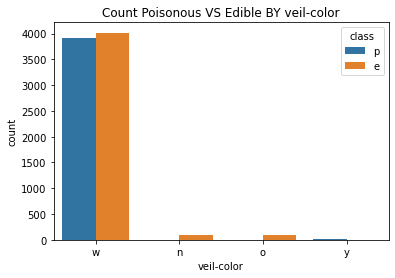

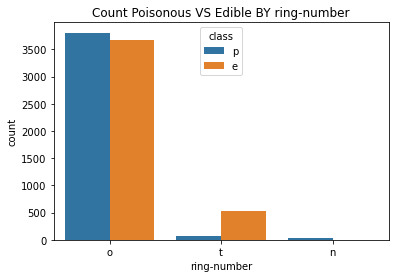

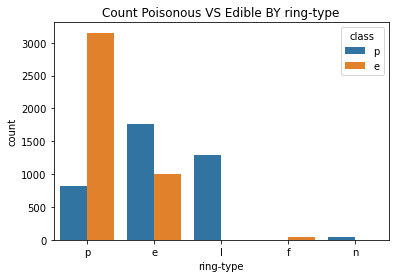

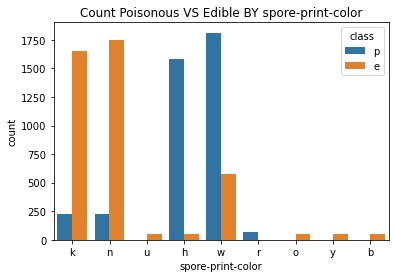

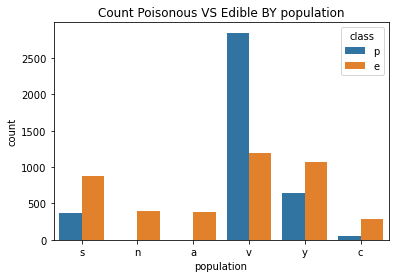

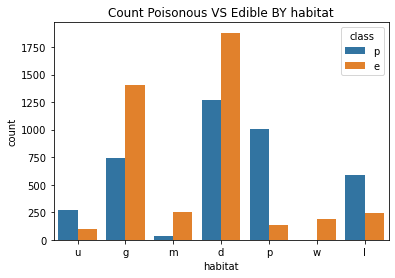

In [13]:
for x in cat_cols:
    plot_cats(data, x, 'class')

In [14]:
data['veil-type'].describe()

count     8124
unique       1
top          p
freq      8124
Name: veil-type, dtype: object

In [15]:
cat_cols.remove('veil-type')
cat_cols.remove('bruises')

In [16]:
data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [21]:
cat_cols.remove('stalk-root')

In [17]:
# drop due to fact that there is no info gained from category, column had missing values or research on bruising inconclusive
data.drop(columns=['veil-type', 'bruises', 'stalk-root'], inplace=True)

# assess data balance and look at poisonous and edible data separately

In [22]:
# create poisonous only df
p_df = data[data['class'] == "p"]
#create edible only df
e_df = data[data['class'] == "e"]

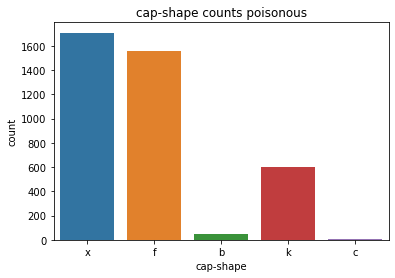

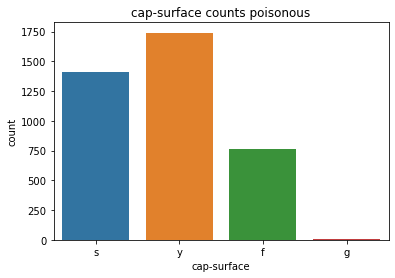

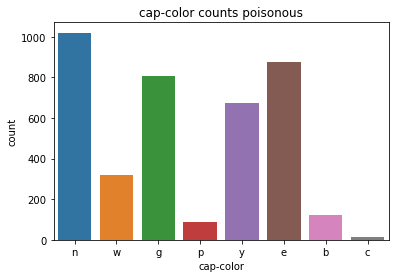

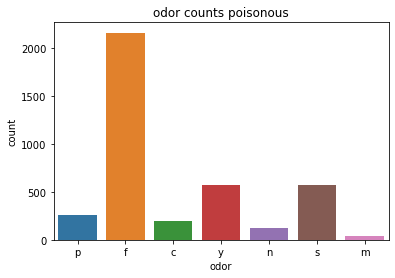

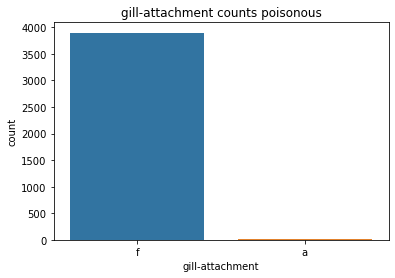

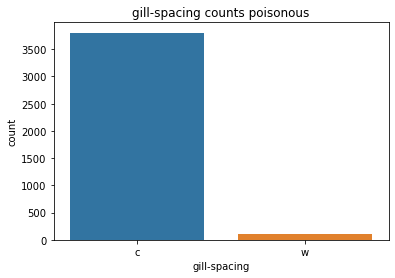

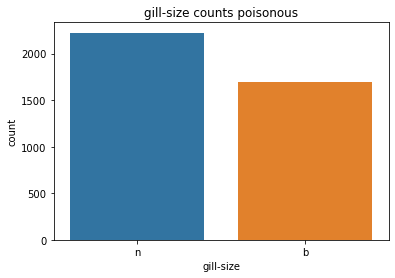

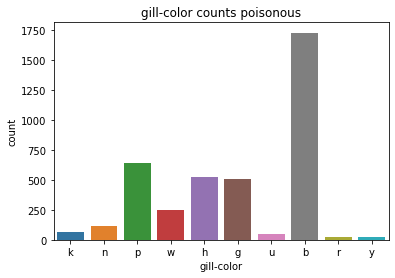

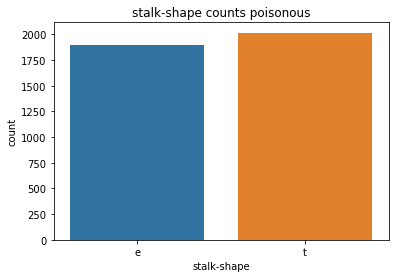

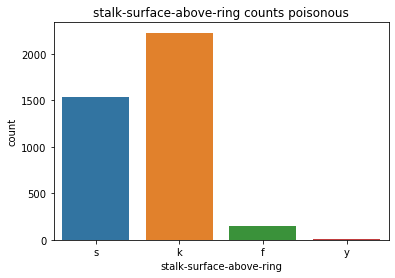

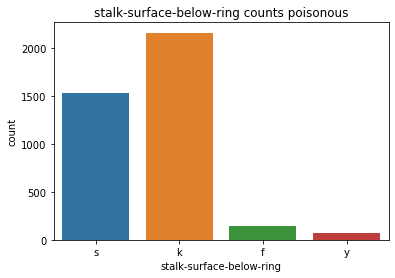

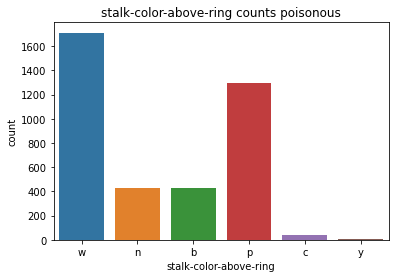

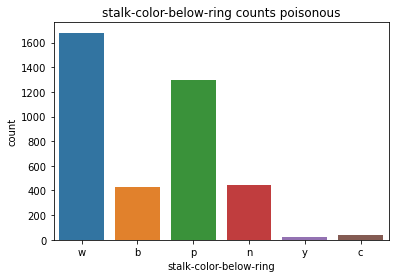

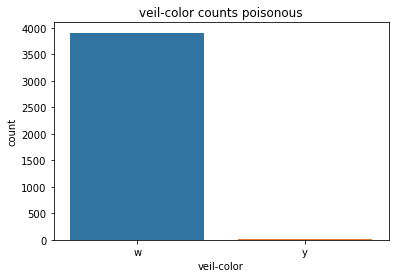

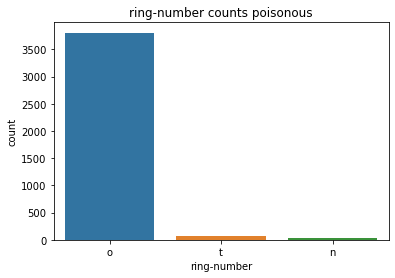

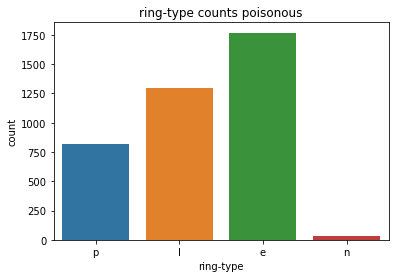

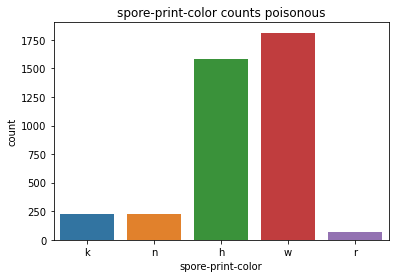

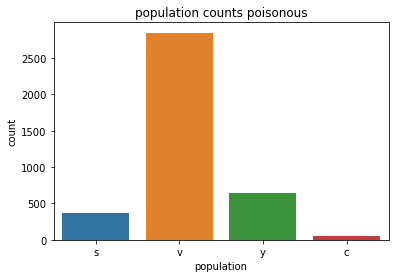

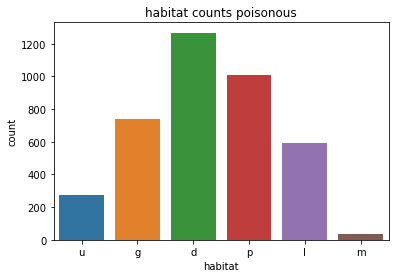

In [23]:
for x in cat_cols:
    plot_counts(p_df, x, 'poisonous')

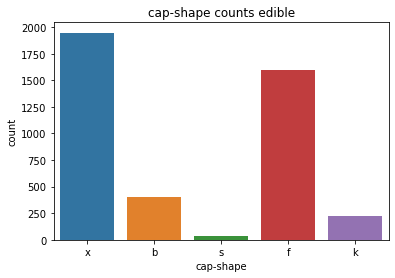

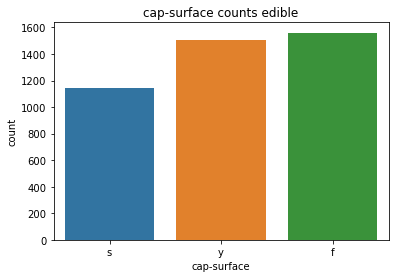

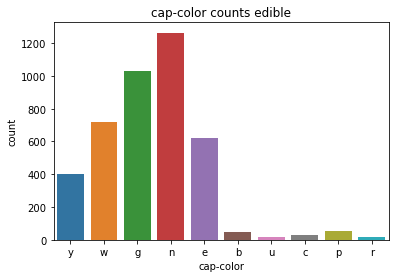

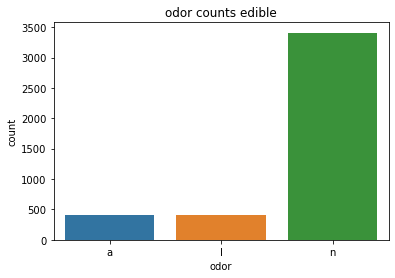

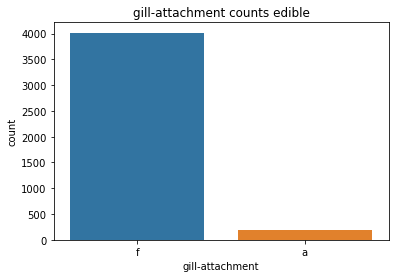

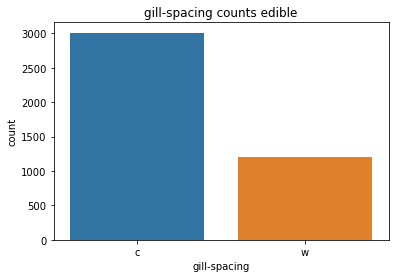

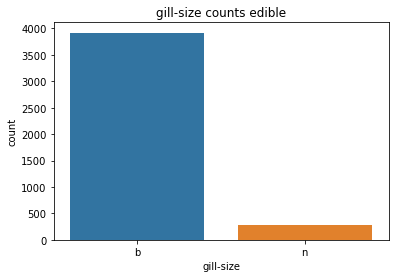

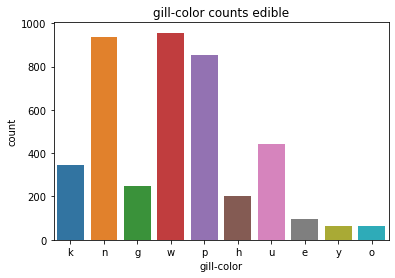

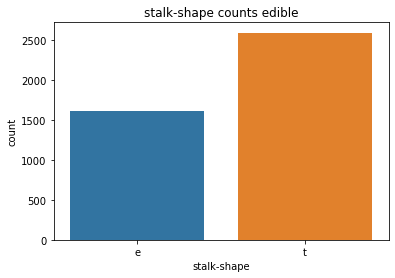

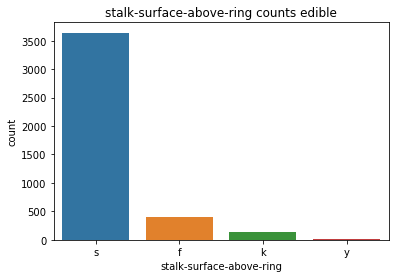

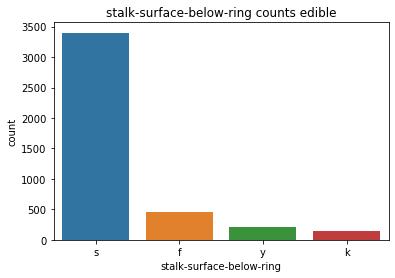

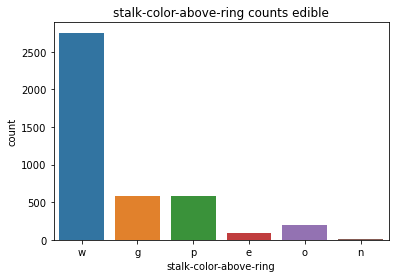

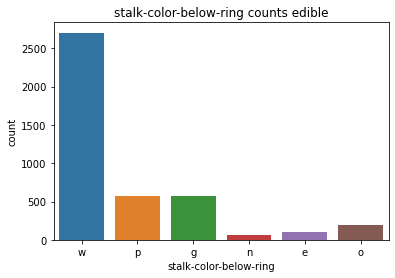

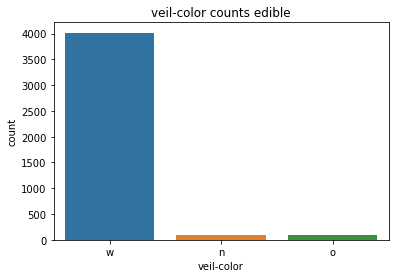

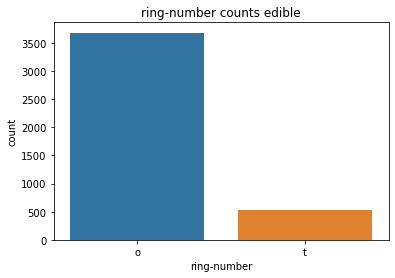

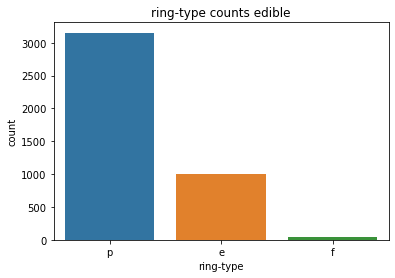

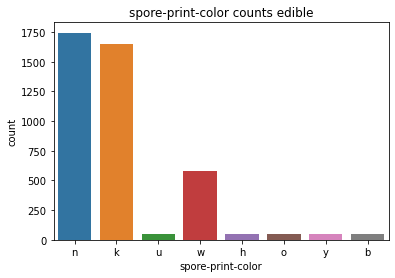

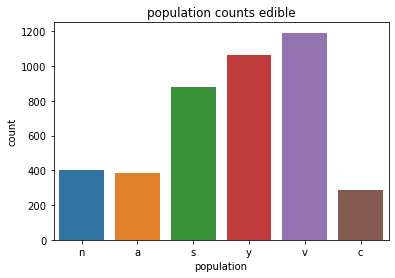

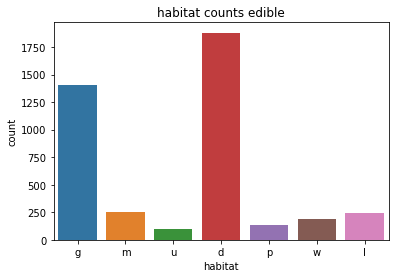

In [24]:
for x in cat_cols:
    plot_counts(e_df, x, 'edible')

In [25]:
p_df.describe()

,class,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916,3916
unique,1,5,4,8,7,2,2,2,10,2,4,4,6,6,2,3,4,5,4,6
top,p,x,y,n,f,f,c,n,b,t,k,k,w,w,w,o,e,w,v,d
freq,3916,1708,1740,1020,2160,3898,3804,2224,1728,2016,2228,2160,1712,1680,3908,3808,1768,1812,2848,1268


In [26]:
e_df.describe()

,class,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208,4208
unique,1,5,3,10,3,2,2,2,10,2,4,4,6,6,3,2,3,8,6,7
top,e,x,f,n,n,f,c,b,w,t,s,s,w,w,w,o,p,n,v,d
freq,4208,1948,1560,1264,3408,4016,3008,3920,956,2592,3640,3400,2752,2704,4016,3680,3152,1744,1192,1880


# process X and y data

In [27]:
target = data['class']

## label encode categorical variables

In [35]:
features = data.copy()

features = features.astype('category')

In [36]:
le = LabelEncoder()
le_df = features.apply(le.fit_transform)   

In [127]:
data

,class,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,p,f,c,n,k,e,s,s,w,w,w,o,p,k,s,u
1,e,x,s,y,a,f,c,b,k,e,s,s,w,w,w,o,p,n,n,g
2,e,b,s,w,l,f,c,b,n,e,s,s,w,w,w,o,p,n,n,m
3,p,x,y,w,p,f,c,n,n,e,s,s,w,w,w,o,p,k,s,u
4,e,x,s,g,n,f,w,b,k,t,s,s,w,w,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,n,a,c,b,y,e,s,s,o,o,o,o,p,b,c,l
8120,e,x,s,n,n,a,c,b,y,e,s,s,o,o,n,o,p,b,v,l
8121,e,f,s,n,n,a,c,b,n,e,s,s,o,o,o,o,p,b,c,l
8122,p,k,y,n,y,f,c,n,b,t,s,k,w,w,w,o,e,w,v,l


## feature selection using variance

In [40]:
le_df.dtypes

class                       int32
cap-shape                   int32
cap-surface                 int32
cap-color                   int32
odor                        int32
gill-attachment             int32
gill-spacing                int32
gill-size                   int32
gill-color                  int32
stalk-shape                 int32
stalk-surface-above-ring    int32
stalk-surface-below-ring    int32
stalk-color-above-ring      int32
stalk-color-below-ring      int32
veil-color                  int32
ring-number                 int32
ring-type                   int32
spore-print-color           int32
population                  int32
habitat                     int32
dtype: object

In [39]:
le_df.corr()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,1.000000,0.052951,0.178446,-0.031384,-0.501530,-0.093552,0.129200,-0.348387,0.540024,-0.530566,...,-0.334593,-0.298801,-0.154003,-0.146730,0.145142,-0.214366,-0.411771,0.171961,0.298686,0.217179
cap-shape,0.052951,1.000000,-0.050454,-0.048203,-0.035374,-0.021935,0.078865,0.013196,0.054050,-0.006039,...,-0.030417,-0.032591,-0.031659,-0.030390,0.072560,-0.106534,-0.025457,-0.073416,0.063413,-0.042221
cap-surface,0.178446,-0.050454,1.000000,-0.019402,0.070228,0.045233,-0.034180,-0.282306,0.208100,-0.161017,...,0.089090,0.107965,0.066050,0.068885,-0.016603,-0.026147,-0.106407,0.230364,0.021555,0.163887
cap-color,-0.031384,-0.048203,-0.019402,1.000000,-0.000764,-0.387121,0.041436,0.144259,-0.169464,0.084659,...,-0.060837,-0.047710,0.002364,0.008057,0.036130,-0.005822,0.162513,-0.293523,-0.144770,0.033925
bruises,-0.501530,-0.035374,0.070228,-0.000764,1.000000,-0.061825,0.137359,-0.299473,-0.369596,0.527120,...,0.460824,0.458983,0.083538,0.092874,0.119770,0.056788,0.692973,-0.285008,0.088137,-0.075095
odor,-0.093552,-0.021935,0.045233,-0.387121,-0.061825,1.000000,-0.059590,0.063936,0.310495,-0.129213,...,0.118617,0.061820,0.174532,0.169407,-0.057747,0.111905,-0.281387,0.469055,-0.043623,-0.026610
gill-attachment,0.129200,0.078865,-0.034180,0.041436,0.137359,-0.059590,1.000000,0.071489,0.108984,-0.128567,...,-0.088916,-0.116177,0.099299,0.097160,0.897518,0.093236,-0.146689,-0.029524,0.165575,-0.030304
gill-spacing,-0.348387,0.013196,-0.282306,0.144259,-0.299473,0.063936,0.071489,1.000000,-0.108333,0.100193,...,-0.212359,-0.213775,0.274574,0.253505,0.073363,0.243014,-0.195897,0.047323,-0.529253,-0.154680
gill-size,0.540024,0.054050,0.208100,-0.169464,-0.369596,0.310495,0.108984,-0.108333,1.000000,-0.516736,...,0.056310,0.010894,0.296548,0.278708,0.103809,-0.171362,-0.460872,0.622991,0.147682,0.161418
gill-color,-0.530566,-0.006039,-0.161017,0.084659,0.527120,-0.129213,-0.128567,0.100193,-0.516736,1.000000,...,0.224287,0.257224,-0.058299,-0.074781,-0.097583,0.096054,0.629398,-0.416135,-0.034090,-0.202972


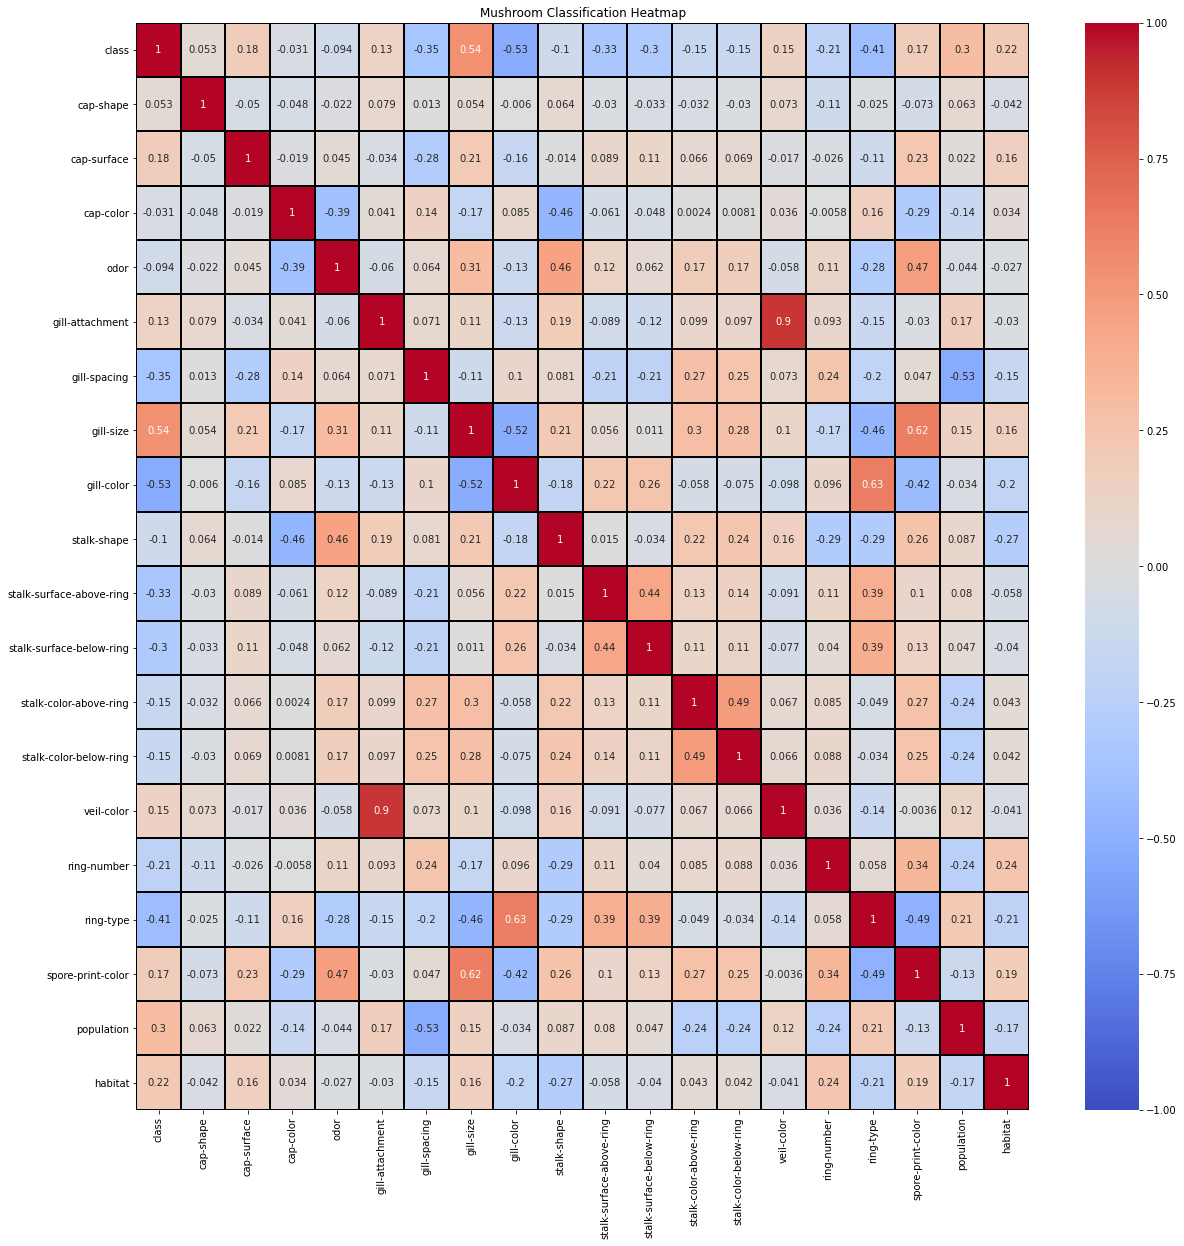

In [41]:
#heat map to assess correlation/collinearity
fig, ax = plt.subplots(figsize=(20, 20))

    
sns.heatmap(le_df.corr(), annot = True,  fmt='.2g', vmin=-1, vmax=1, center= 0, 
            cmap= 'coolwarm', linewidths=1, linecolor='black')
ax.set_title('Mushroom Classification Heatmap')
plt.show() 

## define target variable, 1=poisonous, 0=edible

In [42]:
y = le_df['class']

## define feature variables

In [43]:
le_df.drop(columns=['class'], inplace=True)

In [44]:
le_df

,cap-shape,cap-surface,cap-color,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,6,1,0,1,4,0,2,2,7,7,2,1,4,2,3,5
1,5,2,9,0,1,0,0,4,0,2,2,7,7,2,1,4,3,2,1
2,0,2,8,3,1,0,0,5,0,2,2,7,7,2,1,4,3,2,3
3,5,3,8,6,1,0,1,5,0,2,2,7,7,2,1,4,2,3,5
4,5,2,3,5,1,1,0,4,1,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,3,2,4,5,0,0,0,11,0,2,2,5,5,1,1,4,0,1,2
8120,5,2,4,5,0,0,0,11,0,2,2,5,5,0,1,4,0,4,2
8121,2,2,4,5,0,0,0,5,0,2,2,5,5,1,1,4,0,1,2
8122,3,3,4,8,1,0,1,0,1,2,1,7,7,2,1,0,7,4,2


## one hot encode X categorical variables

In [45]:
ohe = OneHotEncoder(drop='if_binary', sparse=False) 

In [120]:
#onehot = OneHotEncoder(categories='auto', drop='if_binary')
X = ohe.fit_transform(x)
ohe.categories_

[array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([0, 1]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3]),
 array([0, 1, 2]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5, 6])]

In [47]:
X = ohe.transform(le_df)

In [48]:
X.shape

(8124, 105)

In [49]:
le_df.shape

(8124, 19)

In [50]:
y.shape

(8124,)

In [49]:
X_ohe = pd.DataFrame(X)

In [50]:
ohe.categories_

[array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1]),
 array([0, 1]),
 array([0, 1]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 array([0, 1]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3]),
 array([0, 1, 2]),
 array([0, 1, 2, 3, 4]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 array([0, 1, 2, 3, 4, 5]),
 array([0, 1, 2, 3, 4, 5, 6])]

## feature selection using correlation


In [99]:
def covar_selector(X, y ,num_feats):
    covar_list = []
    feature_name = X.columns.tolist()
    
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        covar = np.cov(X[i], y)[0, 1]
        covar_list.append(covar)
    # replace NaN with 0
    covar_list = [0 if np.isnan(i) else i for i in covar_list]
    # feature name
    covar_feature = X.iloc[:,np.argsort(np.abs(covar_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    covar_support = [True if i in covar_feature else False for i in feature_name]
    selected_feature_df = pd.DataFrame(X[covar_feature])
    return selected_feature_df

In [100]:
def var_selector(X, y ,num_feats):
    var_list = []
    feature_name = X.columns.tolist()
    
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        var = np.var(X[i])
        var_list.append(var)
    # replace NaN with 0
    var_list = [0 if np.isnan(i) else i for i in var_list]
    # feature name
    var_feature = X.iloc[:,np.argsort(np.abs(var_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    var_support = [True if i in var_feature else False for i in feature_name]
    selected_feature_df = pd.DataFrame(X[var_feature])
    return selected_feature_df

In [101]:
def cor_selector(X, y ,num_feats):
    cor_list = []
    feature_name = X.columns.tolist()
    # calculate the correlation with y for each feature
    for i in X.columns.tolist():
        cor = np.corrcoef(X[i], y)[0, 1]
        cor_list.append(cor)
    # replace NaN with 0
    cor_list = [0 if np.isnan(i) else i for i in cor_list]
    # feature name
    cor_feature = X.iloc[:,np.argsort(np.abs(cor_list))[-num_feats:]].columns.tolist()
    # feature selection? 0 for not select, 1 for select
    cor_support = [True if i in cor_feature else False for i in feature_name]
    selected_feature_df = pd.DataFrame(X[cor_feature])
    return selected_feature_df

In [102]:
X_correlation_df = cor_selector(le_df, y, 10)

In [103]:
X_var_df = var_selector(le_df, y, 10)

In [104]:
X_covar_df = covar_selector(le_df, y, 10)

In [157]:
ohe=OneHotEncoder(categories='auto',  sparse=False)

In [109]:
xvar_ohe = ohe.fit_transform(X_var_df)

In [110]:
xvar_ohe.shape

(8124, 82)

In [111]:
xcorr_ohe = ohe.fit_transform(X_correlation_df)

In [113]:
xcorr_ohe.shape

(8124, 47)

In [112]:
xcovar_ohe = ohe.fit_transform(X_covar_df)

In [114]:
xcovar_ohe.shape

(8124, 66)

In [399]:
import sklearn
import time
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import f_classif
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix, brier_score_loss, precision_score, recall_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

In [391]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn import svm
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore') 
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.cluster import InterclusterDistance

In [117]:

def cv_score(model, x_train, y_train, y_test):
    #CV scores, 3 fold CV
    scores = cross_val_score(model, x_train, y_train, cv=3)
    #Prediction and accuracy
    accuracy_test = accuracy_score(y_test, y_pred)
    #Print the summary
    print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))
    print ("Test Accuracy: %0.2f" % (accuracy_test))
    

#display confusion matrix 
def confusion(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    
#Visualize the confusion matrix
def vis_cm(model, X, y):
    score = model.score(X, y)
    y_pred = model.predict(X, y)
    confusion = confusion_matrix(y, y_pred)
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    confusion]
    group_percentages = ['{0:.2%}'.format(value) for value in
                     confusion/np.sum(confusion)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion, annot=labels, fmt='', cmap='Blues')
    matrix_title = "Test Accuracy: %0.2f for {model}" % (score)

# prep data for model

In [126]:
y

0       1
1       0
2       0
3       1
4       0
       ..
8119    0
8120    0
8121    0
8122    1
8123    0
Name: class, Length: 8124, dtype: int32

In [122]:
# split ohe data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                     test_size=.2)

In [129]:
# split label encoded data
X_trainLE, X_testLE, y_trainLE, y_testLE = train_test_split(le_df, y, random_state=42,
                                                     test_size=.2)

In [130]:
# features selected by correlation
X_train3, X_test3, y_train3, y_test3 = train_test_split(xcorr_ohe, y, random_state=42,
                                                     test_size=.2)

In [131]:
# features selected by variance
X_train4, X_test4, y_train4, y_test4 = train_test_split(xvar_ohe, y, random_state=42,
                                                     test_size=.2)

In [132]:
# features selected by covariance
X_train5, X_test5, y_train5, y_test5 = train_test_split(xcovar_ohe, y, random_state=42,
                                                     test_size=.2)

In [133]:
# normalize feature data for label encoded data
ss = MinMaxScaler()
X_ts = ss.fit_transform(X_trainLE)
X_tests = ss.transform(X_testLE)

In [294]:
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [366]:
# classification models used to fit data
models = {
    'clf_randforest': RandomForestClassifier(),
    'clf_knn': KNeighborsClassifier(),
    'clf_sgdc': SGDClassifier(),
    'clf_svm': SVC(),
                                                            }
# the optimization parameters for each of the above models
params = {
    'clf_randforest':{ 
        'n_jobs': [-1],
        'max_features': [5, 10, 20 ],
        'min_samples_leaf':[2, 5, 10],
        'max_depth':[5, 8, 10],
        'criterion':['entropy']
        
},
    
    'clf_knn': {
        'weights': ['distance'],
        'algorithm': ['ball_tree', 'kd_tree'],
      
},

    'clf_sgdc' : {
        'learning_rate': ['optimal'],
 
},
    
    'clf_svm' : {
        'kernel': ['rbf', 'linear'], 
        'degree' : [1, 2, 3],
        'C': [.01, .05, 1, 10, 100]}
}

In [364]:
def fit_search(X_data, y_data, X_test, y_test):
    for name in models.keys():
        clf = models[name]
        clf_params = params[name]
        gscv = GridSearchCV(estimator=clf, param_grid=clf_params, 
                                cv=kf, return_train_score=True, refit=True)
        gscv.fit(X_data, y_data)
        sel_model = gscv.best_estimator_
        print("best parameters are: {}".format(sel_model))
        visualizer = ClassificationReport(gscv.best_estimator_, classes=['edible', 'poisonous'], cmap="PuOr", size=(300, 200))
        visualizer.fit(X_train, y_train)  
        visualizer.score(X_test, y_test)
        visualizer.poof()  
        y_pred = sel_model.predict(X_test)
        print(classification_report(y_test, y_pred))
       

        cm = ConfusionMatrix(sel_model, classes=['edible', 'poisonous'], cmap="RdBu", size=(200, 200))
        cm.fit(X_train, y_train)
        cm.score(X_test, y_test)
        cm.show()
        
        

In [389]:
def plot_calibration_curve(est, name, fig_index):
    """Plot calibration curve for est w/o and with calibration. """
    # Calibrated with isotonic calibration
    isotonic = CalibratedClassifierCV(est, cv=2, method='isotonic')

    # Calibrated with sigmoid calibration
    sigmoid = CalibratedClassifierCV(est, cv=2, method='sigmoid')

    # Logistic regression with no calibration as baseline
    lr = LogisticRegression(C=1.)

    fig = plt.figure(fig_index, figsize=(10, 10))
    ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
    ax2 = plt.subplot2grid((3, 1), (2, 0))

    ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
    for clf, name in [(lr, 'Logistic'),
                      (est, name),
                      (isotonic, name + ' + Isotonic'),
                      (sigmoid, name + ' + Sigmoid')]:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        if hasattr(clf, "predict_proba"):
            prob_pos = clf.predict_proba(X_test)[:, 1]
        else:  # use decision function
            prob_pos = clf.decision_function(X_test)
            prob_pos = \
                (prob_pos - prob_pos.min()) / (prob_pos.max() - prob_pos.min())

        clf_score = brier_score_loss(y_test, prob_pos, pos_label=y.max())
        print("%s:" % name)
        print("\tBrier: %1.3f" % (clf_score))
        print("\tPrecision: %1.3f" % precision_score(y_test, y_pred))
        print("\tRecall: %1.3f" % recall_score(y_test, y_pred))
        print("\tF1: %1.3f\n" % f1_score(y_test, y_pred))

        fraction_of_positives, mean_predicted_value = \
            calibration_curve(y_test, prob_pos, n_bins=10)

        ax1.plot(mean_predicted_value, fraction_of_positives, "s-",
                 label="%s (%1.3f)" % (name, clf_score))

        ax2.hist(prob_pos, range=(0, 1), bins=10, label=name,
                 histtype="step", lw=2)

    ax1.set_ylabel("Fraction of positives")
    ax1.set_ylim([-0.05, 1.05])
    ax1.legend(loc="lower right")
    ax1.set_title('Calibration plots  (reliability curve)')

    ax2.set_xlabel("Mean predicted value")
    ax2.set_ylabel("Count")
    ax2.legend(loc="upper center", ncol=2)

    plt.tight_layout()


In [365]:
def clf_results(clf, X_train, y_train, X_test, y_test):
    clf.fit(X_train, y_train)
    scores = cross_val_score(clf, X_train, y_train, scoring='jaccard')
    print(f'cv scores: {scores}')
    print(f'Train Data Score(jaccard) for {clf} is {clf.score(X_train, y_train)} ')
    print('Mean 10 Fold Jaccard Score on Train Data: ', np.mean(scores))
    # Predict on test set
    y_pred = clf.predict(X_test)
    print(f'Test Score for {clf} is {clf.score(X_test, y_test)} ')
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred, target_names=['edible' , 'poisonous']))
    scores = cross_val_score(clf, X_test, y_test, cv=10, scoring='jaccard')
    print(f'cv scores(jaccard): {scores}')
    print('Mean 10 Fold Jaccard Score Test Data: ', np.mean(scores))
    av_prec = metrics.average_precision_score(y_test, y_pred)
    clf_precision, clf_recall, clf_thresholds = metrics.precision_recall_curve(y_test, y_pred)
   
    clf_f1 = sklearn.metrics.cohen_kappa_score(y_test, y_pred)
    clf_pauc = metrics.auc(clf_recall, clf_precision)
    print('Cohens Kappa Score=%.3f AUC Score=%.3f' % (clf_f1, clf_pauc))
    

# full dataset ohe processed

best parameters are: RandomForestClassifier(max_depth=8, max_features=20, min_samples_leaf=2,
                       n_jobs=-1)


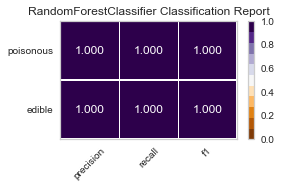

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



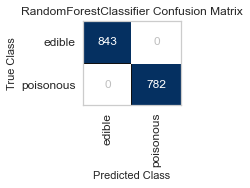

best parameters are: KNeighborsClassifier(algorithm='ball_tree', weights='distance')


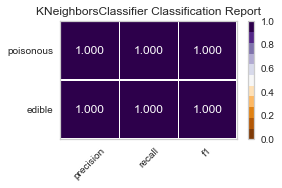

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



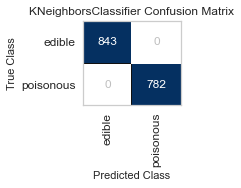

best parameters are: SGDClassifier()


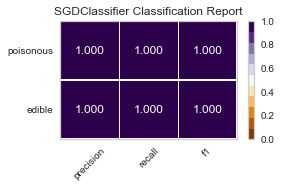

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



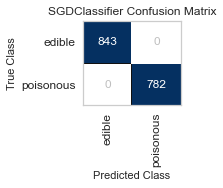

best parameters are: SVC(C=1, degree=1)


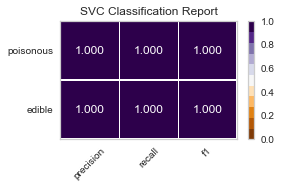

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



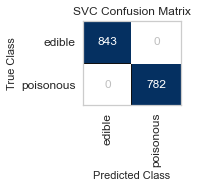

In [298]:
fit_search(X_train, y_train, X_test, y_test)

In [363]:
%%timeit
rf_ohe_model = RandomForestClassifier(criterion='gini', max_depth=10, n_jobs=-1)
clf_results(rf_ohe_model, X_train, y_train, X_test, y_test)

cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for RandomForestClassifier(max_depth=10, n_jobs=-1) is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for RandomForestClassifier(max_depth=10, n_jobs=-1) is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         1.         1.         1.         0.98734177 1.
 1.         0.98717949 1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9974521259331386
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for RandomForestClassifier(max_depth=10, n_jobs=-1) is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for RandomForestClassi

Feature: 0, Score: 0.00561
Feature: 1, Score: 0.00006
Feature: 2, Score: 0.00090
Feature: 3, Score: 0.00119
Feature: 4, Score: 0.00040
Feature: 5, Score: 0.00128
Feature: 6, Score: 0.00723
Feature: 7, Score: 0.00029
Feature: 8, Score: 0.00397
Feature: 9, Score: 0.00338
Feature: 10, Score: 0.00271
Feature: 11, Score: 0.00033
Feature: 12, Score: 0.00109
Feature: 13, Score: 0.00226
Feature: 14, Score: 0.00188
Feature: 15, Score: 0.00166
Feature: 16, Score: 0.00008
Feature: 17, Score: 0.00005
Feature: 18, Score: 0.00331
Feature: 19, Score: 0.00758
Feature: 20, Score: 0.01376
Feature: 21, Score: 0.01467
Feature: 22, Score: 0.09088
Feature: 23, Score: 0.01275
Feature: 24, Score: 0.00146
Feature: 25, Score: 0.15735
Feature: 26, Score: 0.02037
Feature: 27, Score: 0.00454
Feature: 28, Score: 0.00814
Feature: 29, Score: 0.00043
Feature: 30, Score: 0.01822
Feature: 31, Score: 0.07655
Feature: 32, Score: 0.05163
Feature: 33, Score: 0.00116
Feature: 34, Score: 0.00037
Feature: 35, Score: 0.00051
Fe

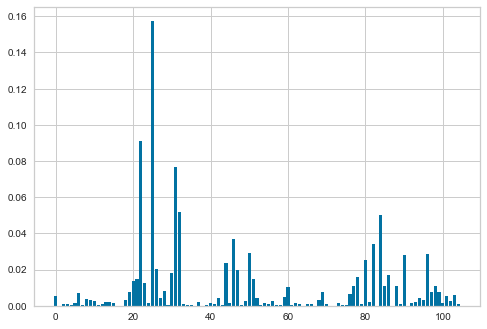

In [271]:
# get importance
importance = rf_ohe_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [367]:
%%timeit
kn_ohe_model = KNeighborsClassifier(algorithm='ball_tree', weights='distance')
clf_results(kn_ohe_model, X_train, y_train, X_test, y_test)

cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for KNeighborsClassifier(algorithm='ball_tree', weights='distance') is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for KNeighborsClassifier(algorithm='ball_tree', weights='distance') is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         1.         1.         0.9875     0.98734177 1.
 1.         1.         1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9974841772151898
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for KNeighborsClassifier(algorithm='ball_tree', weights='distance') is 1.0 
Mean 10 Fold Jaccard Score on Tr

In [368]:
%%timeit
svc_ohe_model = SVC(C=1, degree=1)
clf_results(svc_ohe_model, X_train, y_train, X_test, y_test)

cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for SVC(C=1, degree=1) is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for SVC(C=1, degree=1) is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         1.         1.         1.         0.98734177 1.
 1.         0.98717949 1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9974521259331386
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for SVC(C=1, degree=1) is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for SVC(C=1, degree=1) is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support



In [369]:
%%timeit
sgd_ohe_model = SGDClassifier()
clf_results(sgd_ohe_model, X_train, y_train, X_test, y_test)

cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         1.         1.         1.         0.98734177 1.
 1.         0.98717949 1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9974521259331386
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1.         1.         1.         1.         0.99840256]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  0.9996805111821085
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
            

Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         1.         1.         0.98734177 0.98734177 1.
 1.         1.         1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9974683544303797
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
              precision   

cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         0.98717949 1.         1.         0.98734177 1.
 1.         1.         1.         0.98734177]
Mean 10 Fold Jaccard Score Test Data:  0.9961863031483285
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible

Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1.        1.        0.9984051 1.        1.       ]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  0.9996810207336523
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         1.         1.         1.         0.98734177 1.
 1.         0.98717949 1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9974521259331386
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for SGDClassifier() is 1.0 

cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         1.         1.         1.         0.975      1.
 1.         0.98717949 1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9962179487179487
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1.         1.         1.         1.         0.99680511]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  0.9993610223642172
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
            

cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         1.         1.         1.         0.98734177 1.
 1.         1.         1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9987341772151899
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1.        1.        0.9984051 1.        1.       ]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  0.9996810207336523
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
              pre

Cohens Kappa Score=0.998 AUC Score=0.999
cv scores: [1.         0.99840764 0.9984051  1.         1.        ]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  0.9993625493960726
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         1.         1.         1.         0.95121951 1.
 1.         1.         1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9951219512195122
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1.         1.         1.         1.         0.99680511]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data

cv scores(jaccard): [1.         1.         0.98717949 1.         0.98734177 1.
 1.         1.         1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9974521259331386
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         1.         0.98717949 1.         0.98734177 1.
 1.         0.98717949 1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9961700746510873
Cohens Kappa Score=1.000 AUC Score=1.000
137 ms ± 5.95 ms per loop (mean ± 

Logistic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

RF:
	Brier: 0.001
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

RF + Isotonic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

RF + Sigmoid:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

Logistic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

KN:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

KN + Isotonic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

KN + Sigmoid:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

Logistic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

SGD:
	Brier: 0.070
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

SGD + Isotonic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

SGD + Sigmoid:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

Logistic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

SVC:
	Brier: 0.016
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

SVC + Isotonic:
	Brier: 0.0

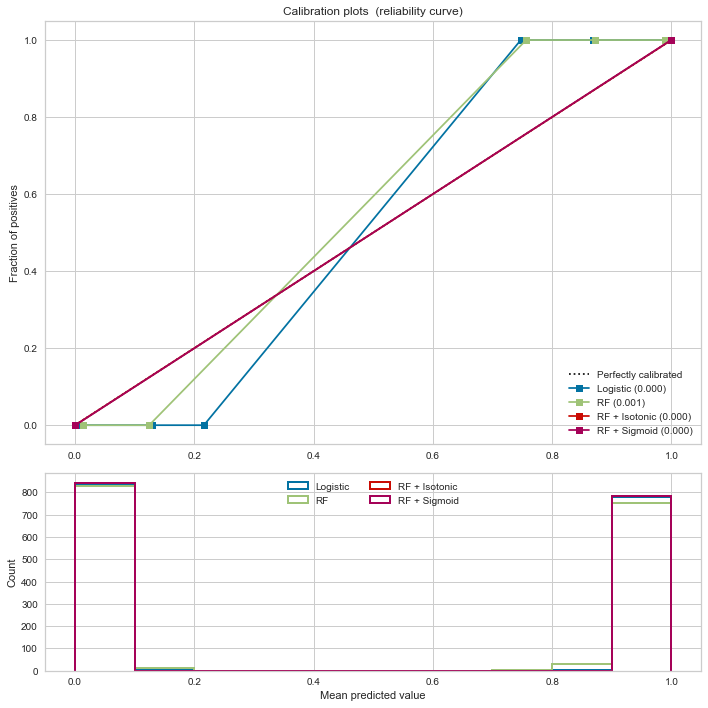

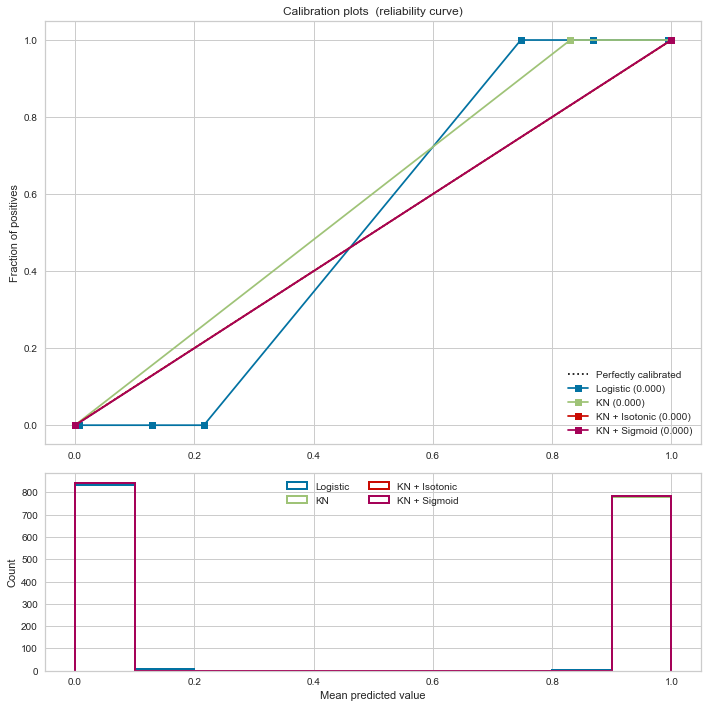

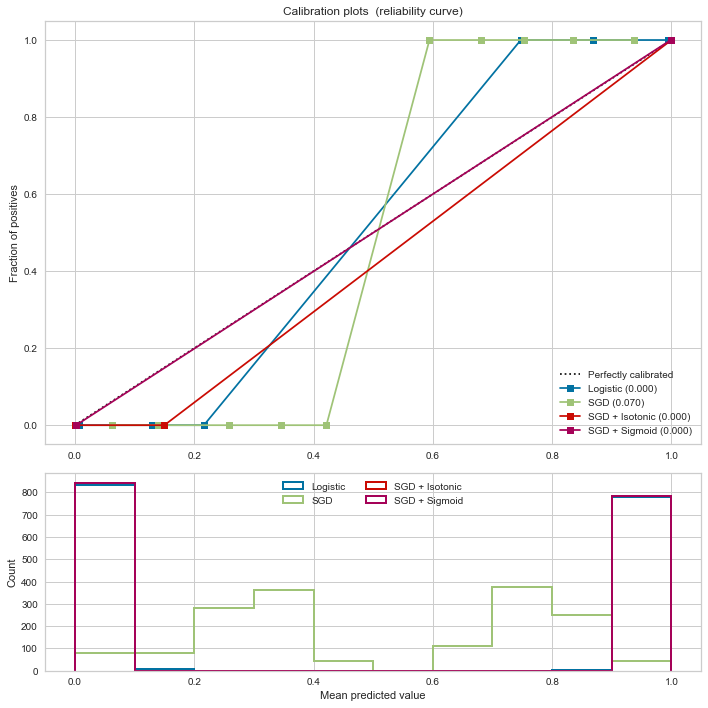

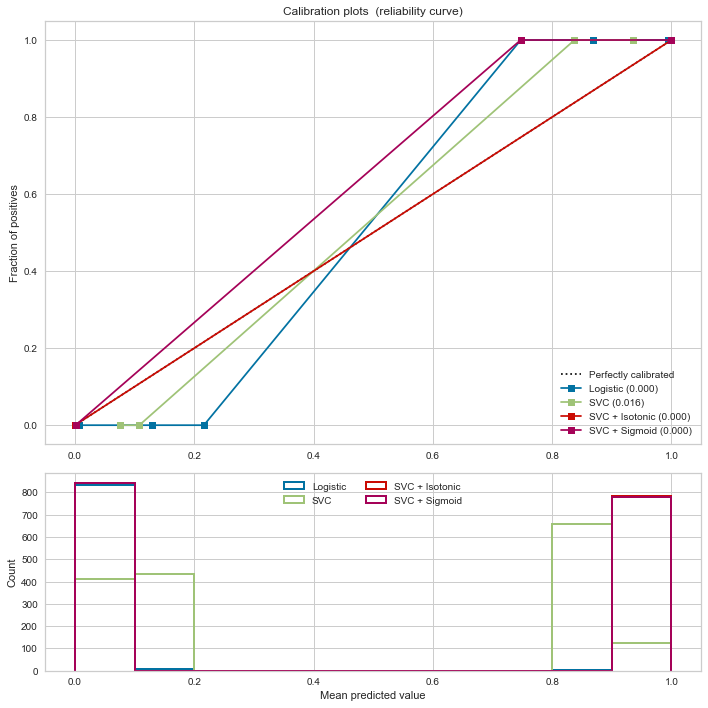

In [401]:
plot_calibration_curve(rf_ohe_model, "RF", 1)
plot_calibration_curve(kn_ohe_model, "KN", 2)
plot_calibration_curve(sgd_ohe_model, "SGD", 3)
plot_calibration_curve(svc_ohe_model, "SVC", 4)

# model fit label encoded data

best parameters are: RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=2,
                       n_jobs=-1)


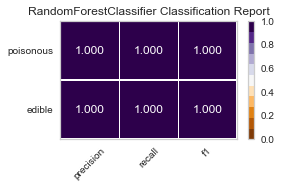

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



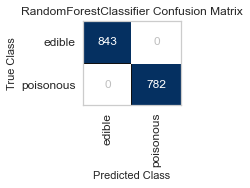

best parameters are: KNeighborsClassifier(algorithm='ball_tree', weights='distance')


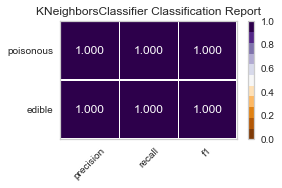

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



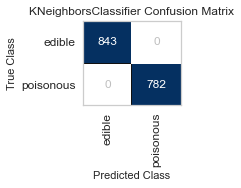

best parameters are: SGDClassifier()


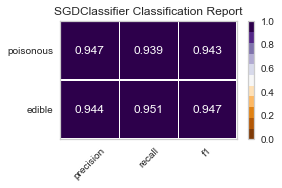

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       843
           1       0.95      0.94      0.94       782

    accuracy                           0.95      1625
   macro avg       0.95      0.94      0.95      1625
weighted avg       0.95      0.95      0.95      1625



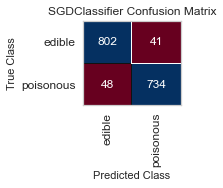

best parameters are: SVC(C=10, degree=1)


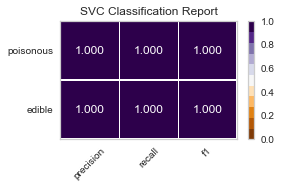

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



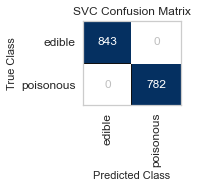

In [299]:
fit_search(X_ts, y_trainLE, X_tests, y_testLE)

In [403]:
%%timeit
rf_LE_model= RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=2,
                       n_jobs=-1)
clf_results(rf_LE_model, X_ts, y_trainLE, X_tests, y_testLE)

cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=2,
                       n_jobs=-1) is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for RandomForestClassifier(max_depth=8, max_features=5, min_samples_leaf=2,
                       n_jobs=-1) is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         1.         1.         1.         0.97468354 1.
 1.         0.98717949 1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9961863031483285
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for RandomForestClassifi

In [404]:
# get importance
importance = rf_LE_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

NameError: name 'rf_LE_model' is not defined

In [ ]:
%%timeit
knn_LE_clf = KNeighborsClassifier(algorithm='ball_tree', weights='distance')
clf_results(knn_LE_clf, X_ts, y_trainLE, X_tests, y_testLE)

In [ ]:
%%timeit
svc_LE_model = SVC(C=10, degree=1)
clf_results(svc_LE_model, X_ts, y_trainLE, X_tests, y_testLE)

In [ ]:
%%timeit
sgd_LE_model = SGDClassifier()
clf_results(sgd_LE_model, X_ts, y_trainLE, X_tests, y_testLE)

In [ ]:
plot_calibration_curve(rf_LE_model, "RF", 1)
plot_calibration_curve(kn_LE_model, "KN", 2)
plot_calibration_curve(sgd_LE_model, "SGD", 3)
plot_calibration_curve(svc_LE_model, "SVC", 4)

# models for feature selected data 

In [374]:
# classification models used to fit data
models = {
    'clf_randforest': RandomForestClassifier(),
    'clf_knn': KNeighborsClassifier(),
    'clf_sgdc': SGDClassifier(),
    'clf_svm': SVC(),
                                                            }
# the optimization parameters for each of the above models
params = {
    'clf_randforest':{ 
        'n_jobs': [-1],
        #'max_features': [2, 3, 5, 7, 10],
        'criterion': ['entropy'],
        'max_depth':[5, 7, 8, 10, 12],
},
    
    'clf_knn': {
        'weights': ['distance'],
        'algorithm': ['ball_tree', 'kd_tree'],
      
},

    'clf_sgdc' : {
        'learning_rate': ['optimal'],
        'loss':['hinge', 'log',],
},
    
    'clf_svm' : {
        'kernel': ['rbf',], 
        'degree' : [1, 2,],
        'C': [.01, .05, 1, 10, 100],
},
    
}

# model data features selected by correlation coefficients

best parameters are: RandomForestClassifier(criterion='entropy', max_depth=12, n_jobs=-1)


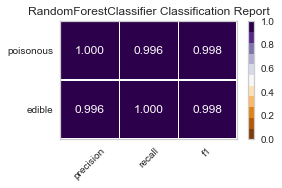

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



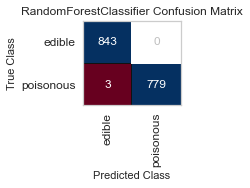

best parameters are: KNeighborsClassifier(algorithm='ball_tree', weights='distance')


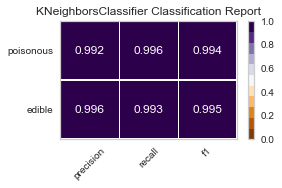

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       843
           1       0.99      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



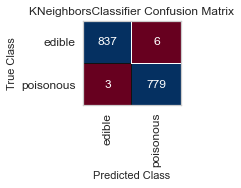

best parameters are: SGDClassifier()


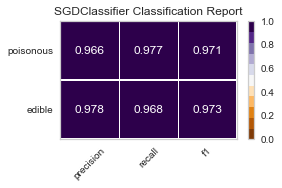

              precision    recall  f1-score   support

           0       0.98      0.97      0.97       843
           1       0.97      0.98      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625



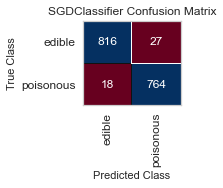

best parameters are: SVC(C=1, degree=1)


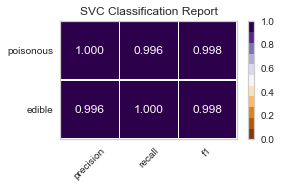

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



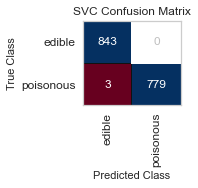

In [375]:
fit_search(X_train3, y_train3, X_test3, y_test3)

In [376]:
%%timeit
rf_corr_model = RandomForestClassifier(criterion='entropy', max_depth=12, n_jobs=-1)
clf_results(rf_corr_model, X_train3, y_train3, X_test3, y_test3)

cv scores: [0.98724083 0.99521531 0.98245614 0.98883573 0.98730159]
Train Data Score(jaccard) for RandomForestClassifier(criterion='entropy', max_depth=12, n_jobs=-1) is 0.9949222957378058 
Mean 10 Fold Jaccard Score on Train Data:  0.9882099187362346
Test Score for RandomForestClassifier(criterion='entropy', max_depth=12, n_jobs=-1) is 0.9981538461538462 
[[843   0]
 [  3 779]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         0.98717949 0.98717949 0.98734177 0.98734177 0.975
 1.         0.98717949 0.97435897 0.98734177]
Mean 10 Fold Jaccard Score Test Data:  0.9872922752353132
Cohens Kappa Score=0.996 AUC Score=0.999
cv scores: [0.98724083 0.99521531 0.98245614 0.98883573 0.987301

In [377]:
%%timeit
kn_corr_model = KNeighborsClassifier(algorithm='ball_tree', weights='distance')
clf_results(kn_corr_model, X_train3, y_train3, X_test3, y_test3)

cv scores: [0.98883573 0.99523052 0.98566879 0.98887122 0.98888889]
Train Data Score(jaccard) for KNeighborsClassifier(algorithm='ball_tree', weights='distance') is 0.99523003539006 
Mean 10 Fold Jaccard Score on Train Data:  0.9894990306366538
Test Score for KNeighborsClassifier(algorithm='ball_tree', weights='distance') is 0.9944615384615385 
[[837   6]
 [  3 779]]
              precision    recall  f1-score   support

      edible       1.00      0.99      0.99       843
   poisonous       0.99      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

cv scores(jaccard): [1.         0.98717949 0.98717949 0.98734177 0.98734177 0.96296296
 0.98717949 0.97435897 0.97435897 1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.984790291752317
Cohens Kappa Score=0.989 AUC Score=0.995
cv scores: [0.98883573 0.99523052 0.98566879 0.98887122 0.98888889]
Trai

In [378]:
%%timeit
svc_corr_model = SVC(C=10, degree=1)
clf_results(svc_corr_model, X_train3, y_train3, X_test3, y_test3)

cv scores: [0.98883573 0.99681021 0.98405104 0.99202552 0.99520767]
Train Data Score(jaccard) for SVC(C=10, degree=1) is 0.9958455146945684 
Mean 10 Fold Jaccard Score on Train Data:  0.9913860311539814
Test Score for SVC(C=10, degree=1) is 0.9981538461538462 
[[843   0]
 [  3 779]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         0.98717949 1.         1.         0.98734177 0.96296296
 1.         0.98717949 0.97435897 1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.989902268383281
Cohens Kappa Score=0.996 AUC Score=0.999
cv scores: [0.98883573 0.99681021 0.98405104 0.99202552 0.99520767]
Train Data Score(jaccard) for SVC(C=10, degree=1) is 0.9958455146945684 
Mean 10 Fold Jacc

In [379]:
%%timeit
sgd_corr_model = SGDClassifier()
clf_results(sgd_corr_model, X_train3, y_train3, X_test3, y_test3)

cv scores: [0.946875   0.95121951 0.94848485 0.94615385 0.94435858]
Train Data Score(jaccard) for SGDClassifier() is 0.9764579166025542 
Mean 10 Fold Jaccard Score on Train Data:  0.9474183569772734
Test Score for SGDClassifier() is 0.976 
[[822  21]
 [ 18 764]]
              precision    recall  f1-score   support

      edible       0.98      0.98      0.98       843
   poisonous       0.97      0.98      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

cv scores(jaccard): [0.97435897 0.93670886 0.975      0.95180723 0.85       0.90361446
 0.9625     0.93670886 0.88505747 0.925     ]
Mean 10 Fold Jaccard Score Test Data:  0.9300755853889319
Cohens Kappa Score=0.952 AUC Score=0.981
cv scores: [0.95031056 0.96557121 0.94348509 0.95054096 0.94654088]
Train Data Score(jaccard) for SGDClassifier() is 0.9764579166025542 
Mean 10 Fold Jaccard Score on Train Data:

cv scores: [0.95268139 0.95531587 0.93623639 0.93518519 0.9480315 ]
Train Data Score(jaccard) for SGDClassifier() is 0.9784582243422065 
Mean 10 Fold Jaccard Score on Train Data:  0.9454900663487622
Test Score for SGDClassifier() is 0.9753846153846154 
[[816  27]
 [ 13 769]]
              precision    recall  f1-score   support

      edible       0.98      0.97      0.98       843
   poisonous       0.97      0.98      0.97       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

cv scores(jaccard): [0.94871795 0.92682927 0.94936709 0.95180723 0.8875     0.91463415
 0.97435897 0.93670886 0.9375     0.95061728]
Mean 10 Fold Jaccard Score Test Data:  0.9378040799944438
Cohens Kappa Score=0.951 AUC Score=0.979
cv scores: [0.95583596 0.94598765 0.94736842 0.94453005 0.953125  ]
Train Data Score(jaccard) for SGDClassifier() is 0.9795353131250961 
Mean 10 Fold Jaccard Score o

cv scores: [0.95590551 0.96232339 0.93457944 0.94435858 0.95524691]
Train Data Score(jaccard) for SGDClassifier() is 0.9764579166025542 
Mean 10 Fold Jaccard Score on Train Data:  0.9504827667181953
Test Score for SGDClassifier() is 0.9747692307692307 
[[822  21]
 [ 20 762]]
              precision    recall  f1-score   support

      edible       0.98      0.98      0.98       843
   poisonous       0.97      0.97      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

cv scores(jaccard): [0.96153846 0.91358025 0.97468354 0.96341463 0.89156627 0.90361446
 0.97468354 0.94871795 0.925      0.95061728]
Mean 10 Fold Jaccard Score Test Data:  0.940741638676611
Cohens Kappa Score=0.949 AUC Score=0.980
cv scores: [0.95590551 0.96394984 0.94875776 0.9296875  0.946875  ]
Train Data Score(jaccard) for SGDClassifier() is 0.9803046622557317 
Mean 10 Fold Jaccard Score on

cv scores(jaccard): [0.95       0.94871795 0.96153846 0.95121951 0.91463415 0.9047619
 0.96202532 0.93589744 0.93902439 0.925     ]
Mean 10 Fold Jaccard Score Test Data:  0.9392819116151936
Cohens Kappa Score=0.952 AUC Score=0.981
cv scores: [0.94976452 0.95761381 0.93855607 0.93023256 0.953125  ]
Train Data Score(jaccard) for SGDClassifier() is 0.9749192183412833 
Mean 10 Fold Jaccard Score on Train Data:  0.9458583923355249
Test Score for SGDClassifier() is 0.9747692307692307 
[[822  21]
 [ 20 762]]
              precision    recall  f1-score   support

      edible       0.98      0.98      0.98       843
   poisonous       0.97      0.97      0.97       782

    accuracy                           0.97      1625
   macro avg       0.97      0.97      0.97      1625
weighted avg       0.97      0.97      0.97      1625

cv scores(jaccard): [0.94936709 0.91358025 0.95121951 0.91860465 0.8875     0.87356322
 0.97468354 0.94936709 0.9        0.91025641]
Mean 10 Fold Jaccard Score Test D

cv scores: [0.9640625  0.95839753 0.95658915 0.9504644  0.95461659]
Train Data Score(jaccard) for SGDClassifier() is 0.9747653485151562 
Mean 10 Fold Jaccard Score on Train Data:  0.9568260333319556
Test Score for SGDClassifier() is 0.9778461538461538 
[[827  16]
 [ 20 762]]
              precision    recall  f1-score   support

      edible       0.98      0.98      0.98       843
   poisonous       0.98      0.97      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

cv scores(jaccard): [0.97468354 0.90123457 0.98734177 0.95180723 0.87804878 0.89411765
 0.97468354 0.93670886 0.925      0.91666667]
Mean 10 Fold Jaccard Score Test Data:  0.9340292612549179
Cohens Kappa Score=0.956 AUC Score=0.983
cv scores: [0.94290123 0.96840442 0.94392523 0.94272446 0.94944708]
Train Data Score(jaccard) for SGDClassifier() is 0.9749192183412833 
Mean 10 Fold Jaccard Score o

cv scores(jaccard): [0.96153846 0.9125     0.96296296 0.92941176 0.8902439  0.89285714
 0.96153846 0.94871795 0.91666667 0.88888889]
Mean 10 Fold Jaccard Score Test Data:  0.926532620031544
Cohens Kappa Score=0.952 AUC Score=0.981
cv scores: [0.95341615 0.95391705 0.94392523 0.9234375  0.95125786]
Train Data Score(jaccard) for SGDClassifier() is 0.9743037390367749 
Mean 10 Fold Jaccard Score on Train Data:  0.9451907590079294
Test Score for SGDClassifier() is 0.976 
[[830  13]
 [ 26 756]]
              precision    recall  f1-score   support

      edible       0.97      0.98      0.98       843
   poisonous       0.98      0.97      0.97       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

cv scores(jaccard): [0.8974359  0.92405063 0.96296296 0.95180723 0.85393258 0.89285714
 0.94871795 0.92405063 0.86516854 0.91025641]
Mean 10 Fold Jaccard Score Test Data:  0.91312

cv scores: [0.95       0.94969512 0.93613707 0.93478261 0.95283019]
Train Data Score(jaccard) for SGDClassifier() is 0.9767656562548084 
Mean 10 Fold Jaccard Score on Train Data:  0.9446889981954415
Test Score for SGDClassifier() is 0.9772307692307692 
[[827  16]
 [ 21 761]]
              precision    recall  f1-score   support

      edible       0.98      0.98      0.98       843
   poisonous       0.98      0.97      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

cv scores(jaccard): [0.94936709 0.91358025 0.89655172 0.94047619 0.92682927 0.9047619
 0.97468354 0.93670886 0.91463415 0.95061728]
Mean 10 Fold Jaccard Score Test Data:  0.9308210258545255
Cohens Kappa Score=0.954 AUC Score=0.983
cv scores: [0.94794953 0.96723869 0.94080997 0.94582043 0.95433071]
Train Data Score(jaccard) for SGDClassifier() is 0.979381443298969 
Mean 10 Fold Jaccard Score on 

cv scores(jaccard): [0.97435897 0.93589744 0.98717949 0.95180723 0.86585366 0.90243902
 0.9625     0.93589744 0.89534884 0.95061728]
Mean 10 Fold Jaccard Score Test Data:  0.9361899366335745
Cohens Kappa Score=0.951 AUC Score=0.983
cv scores: [0.9591195  0.96546311 0.94656489 0.9046875  0.940625  ]
Train Data Score(jaccard) for SGDClassifier() is 0.9781504846899522 
Mean 10 Fold Jaccard Score on Train Data:  0.9432919981343562
Test Score for SGDClassifier() is 0.9778461538461538 
[[822  21]
 [ 15 767]]
              precision    recall  f1-score   support

      edible       0.98      0.98      0.98       843
   poisonous       0.97      0.98      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

cv scores(jaccard): [0.97435897 0.91358025 1.         0.95180723 0.87654321 0.9047619
 0.97468354 0.93670886 0.925      0.9125    ]
Mean 10 Fold Jaccard Score Test D

In [ ]:
plot_calibration_curve(rf_corr_model, "RF", 1)
plot_calibration_curve(kn_corr_model, "KN", 2)
plot_calibration_curve(sgd_corr_model, "SGD", 3)
plot_calibration_curve(svc_corr_model, "SVC", 4)

# model data (features selected by variance)

best parameters are: RandomForestClassifier(criterion='entropy', max_depth=12, n_jobs=-1)


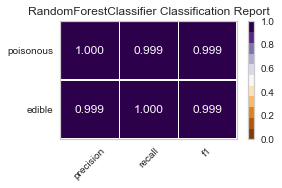

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



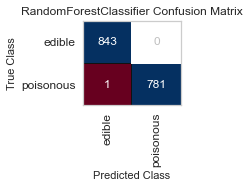

best parameters are: KNeighborsClassifier(algorithm='ball_tree', weights='distance')


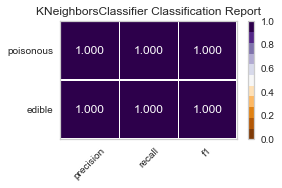

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



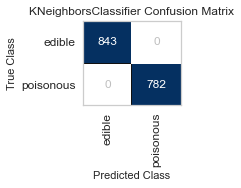

best parameters are: SGDClassifier()


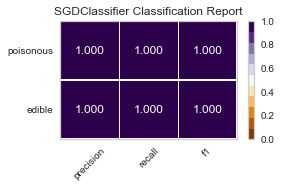

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



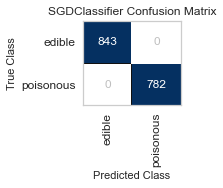

best parameters are: SVC(C=10, degree=1)


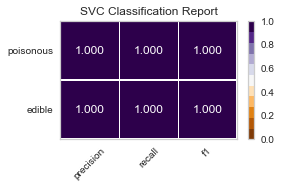

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



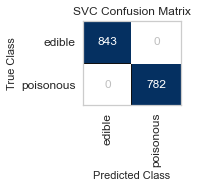

In [232]:
fit_search(X_train4, y_train4, X_test4, y_test4)

In [349]:
import time

In [380]:
%%timeit
rf_var_model = RandomForestClassifier(criterion='entropy', max_depth=12, n_jobs=-1)
clf_results(rf_var_model, X_train4, y_train4, X_test4, y_test4)

cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for RandomForestClassifier(criterion='entropy', max_depth=12, n_jobs=-1) is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for RandomForestClassifier(criterion='entropy', max_depth=12, n_jobs=-1) is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         1.         1.         1.         0.98734177 1.
 1.         0.98717949 1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9974521259331386
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1.        1.        0.9984051 1.        1.       ]
Train Data Score(jaccard) for RandomForestClassifier(criterion='entropy', max_depth=12, n

In [381]:
%%timeit
kn_var_model = KNeighborsClassifier(algorithm='ball_tree', weights='distance')
clf_results(kn_var_model, X_train4, y_train4, X_test4, y_test4)

cv scores: [1.        1.        0.9984051 1.        1.       ]
Train Data Score(jaccard) for KNeighborsClassifier(algorithm='ball_tree', weights='distance') is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  0.9996810207336523
Test Score for KNeighborsClassifier(algorithm='ball_tree', weights='distance') is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         1.         1.         1.         0.975      0.98734177
 1.         0.97468354 1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9937025316455695
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1.        1.        0.9984051 1.        1.       ]
Train Data Score(jaccard) for KNeighborsC

In [382]:
%%timeit
svc_var_model = SVC(C=10, degree=1)
clf_results(svc_var_model, X_train4, y_train4, X_test4, y_test4)

cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for SVC(C=10, degree=1) is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for SVC(C=10, degree=1) is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         1.         1.         1.         0.98734177 1.
 1.         0.98717949 1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9974521259331386
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for SVC(C=10, degree=1) is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for SVC(C=10, degree=1) is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   suppo

In [383]:
%%timeit
sgd_var_model = SGDClassifier()
clf_results(sgd_var_model, X_train4, y_train4, X_test4, y_test4)

cv scores: [1.        1.        0.9984051 1.        1.       ]
Train Data Score(jaccard) for SGDClassifier() is 0.9992306508693645 
Mean 10 Fold Jaccard Score on Train Data:  0.9996810207336523
Test Score for SGDClassifier() is 0.9993846153846154 
[[843   0]
 [  1 781]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         0.98717949 1.         1.         0.98734177 1.
 1.         1.         1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9974521259331386
Cohens Kappa Score=0.999 AUC Score=1.000
cv scores: [0.99043062 1.         1.         1.         0.99680511]
Train Data Score(jaccard) for SGDClassifier() is 0.9990767810432374 
Mean 10 Fold Jaccard Score on Train Data:

cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for SGDClassifier() is 0.9976919526080935 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Test Score for SGDClassifier() is 0.9981538461538462 
[[843   0]
 [  3 779]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         0.98717949 1.         1.         0.98734177 1.
 1.         1.         1.         0.98717949]
Mean 10 Fold Jaccard Score Test Data:  0.9961700746510873
Cohens Kappa Score=0.996 AUC Score=0.999
cv scores: [0.99202552 1.         1.         1.         1.        ]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  0.9984051036682615
Test Score for SGDClassifier() is 1.0 
[[843

cv scores: [0.99202552 1.         1.         1.         1.        ]
Train Data Score(jaccard) for SGDClassifier() is 0.9993845206954917 
Mean 10 Fold Jaccard Score on Train Data:  0.9984051036682615
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [0.98734177 0.98717949 1.         1.         0.975      1.
 1.         1.         1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9949521259331385
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [0.99681021 1.         1.         1.         0.99520767]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  0.9984035750136305
Test

cv scores: [1.         1.         1.         0.9984051  0.99840256]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  0.9993615319157609
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         0.98717949 1.         1.         0.98734177 1.
 1.         0.98717949 1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9961700746510873
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1.         1.         1.         1.         0.99520767]
Train Data Score(jaccard) for SGDClassifier() is 0.9992306508693645 
Mean 10 Fold Jaccard Score on Train Data:  0.999041533546326
Test 

Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [0.99681021 1.         1.         1.         1.        ]
Train Data Score(jaccard) for SGDClassifier() is 0.9990767810432374 
Mean 10 Fold Jaccard Score on Train Data:  0.9993620414673046
Test Score for SGDClassifier() is 0.9987692307692307 
[[843   0]
 [  2 780]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         0.98717949 1.         1.         0.98734177 1.
 1.         1.         1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9974521259331386
Cohens Kappa Score=0.998 AUC Score=0.999
cv scores: [1. 1. 1. 1. 1.]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  1.0
Tes

cv scores: [0.99362041 1.         0.9984051  1.         1.        ]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  0.9984051036682615
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         0.98717949 1.         1.         0.98734177 1.
 1.         0.98717949 1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9961700746510873
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [0.99681021 1.         0.9984051  1.         0.99680511]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  0.998404084565174
Test Score for SGDCl

cv scores: [1.         1.         1.         1.         0.99680511]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  0.9993610223642172
Test Score for SGDClassifier() is 1.0 
[[843   0]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      1.00      1.00       843
   poisonous       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [1.         1.         1.         1.         0.98734177 1.
 1.         1.         0.95121951 1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9938561284347021
Cohens Kappa Score=1.000 AUC Score=1.000
cv scores: [1.         1.         0.98584906 0.9984051  0.99680511]
Train Data Score(jaccard) for SGDClassifier() is 1.0 
Mean 10 Fold Jaccard Score on Train Data:  0.9962118544186243
Test Score for SGDC

Feature: 0, Score: 0.00112
Feature: 1, Score: 0.00354
Feature: 2, Score: 0.00801
Feature: 3, Score: 0.00714
Feature: 4, Score: 0.04006
Feature: 5, Score: 0.00742
Feature: 6, Score: 0.00545
Feature: 7, Score: 0.00031
Feature: 8, Score: 0.00115
Feature: 9, Score: 0.00051
Feature: 10, Score: 0.00028
Feature: 11, Score: 0.00192
Feature: 12, Score: 0.01291
Feature: 13, Score: 0.01006
Feature: 14, Score: 0.00428
Feature: 15, Score: 0.00962
Feature: 16, Score: 0.00618
Feature: 17, Score: 0.00912
Feature: 18, Score: 0.00488
Feature: 19, Score: 0.01570
Feature: 20, Score: 0.00300
Feature: 21, Score: 0.04796
Feature: 22, Score: 0.00181
Feature: 23, Score: 0.05915
Feature: 24, Score: 0.00165
Feature: 25, Score: 0.00073
Feature: 26, Score: 0.00080
Feature: 27, Score: 0.00566
Feature: 28, Score: 0.00343
Feature: 29, Score: 0.00033
Feature: 30, Score: 0.00584
Feature: 31, Score: 0.01264
Feature: 32, Score: 0.00103
Feature: 33, Score: 0.00353
Feature: 34, Score: 0.00210
Feature: 35, Score: 0.00052
Fe

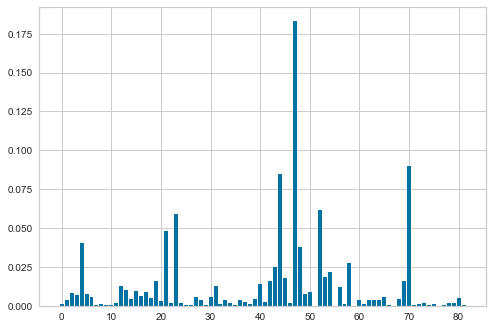

In [260]:
# get importance
importance = rf_var_model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

Logistic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

RF:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

RF + Isotonic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

RF + Sigmoid:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

Logistic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

KN:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

KN + Isotonic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

KN + Sigmoid:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

Logistic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

SGD:
	Brier: 0.069
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

SGD + Isotonic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

SGD + Sigmoid:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

Logistic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

SVC:
	Brier: 0.016
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

SVC + Isotonic:
	Brier: 0.0

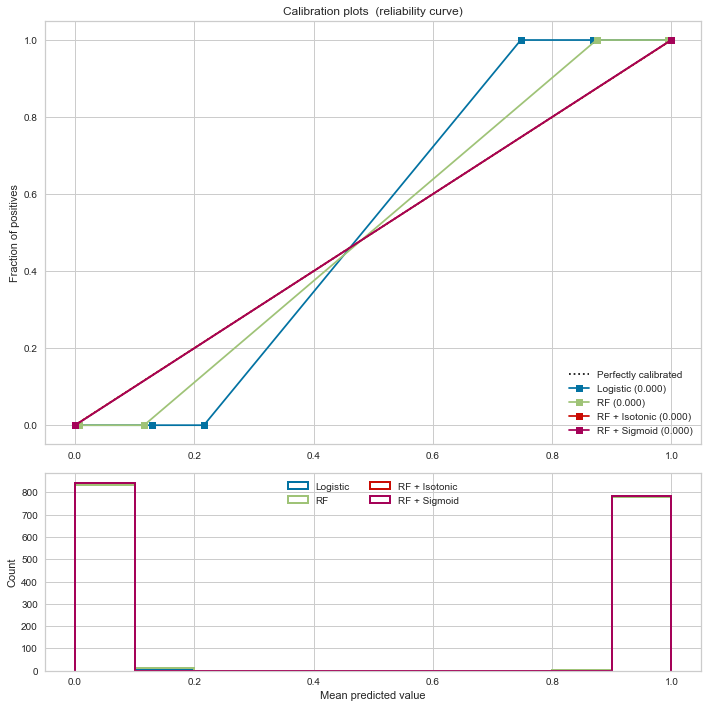

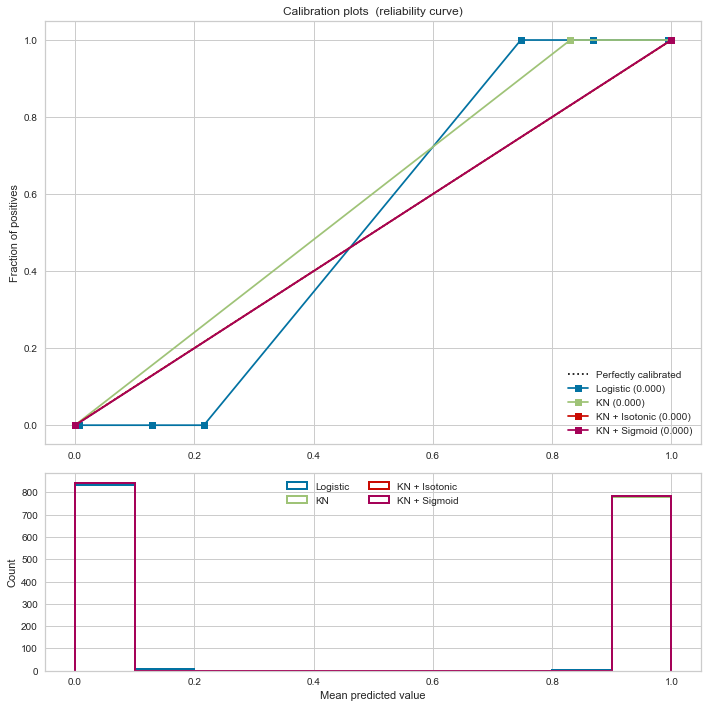

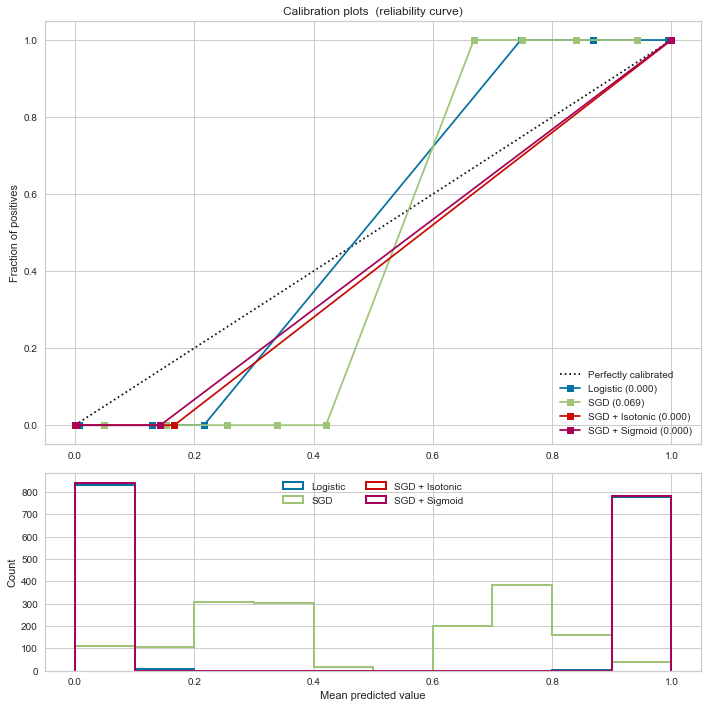

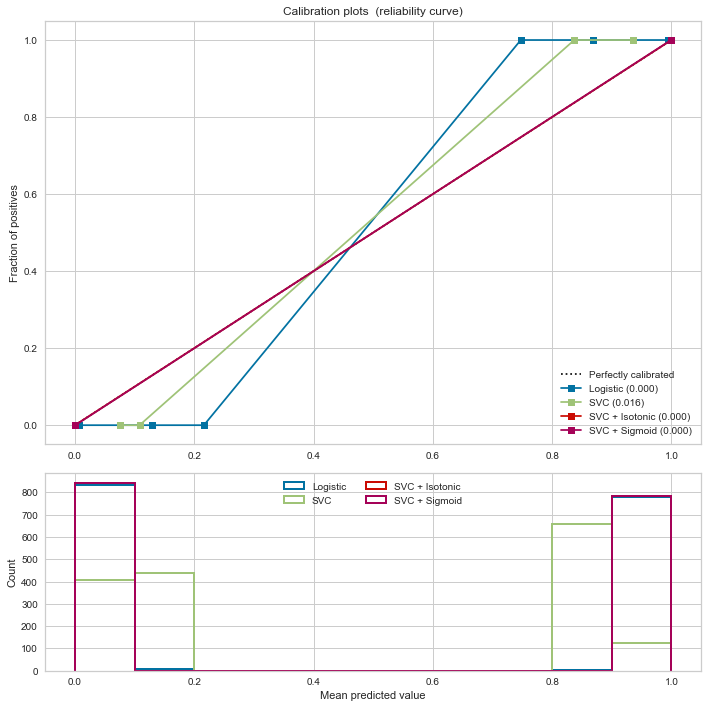

In [405]:
plot_calibration_curve(rf_var_model, "RF", 1)
plot_calibration_curve(kn_var_model, "KN", 2)
plot_calibration_curve(sgd_var_model, "SGD", 3)
plot_calibration_curve(svc_var_model, "SVC", 4)

# model data (features selected by covariance)

best parameters are: RandomForestClassifier(criterion='entropy', max_depth=10, n_jobs=-1)


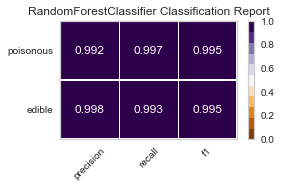

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       843
           1       0.99      1.00      0.99       782

    accuracy                           1.00      1625
   macro avg       0.99      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



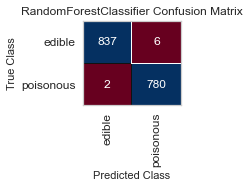

best parameters are: KNeighborsClassifier(algorithm='ball_tree', weights='distance')


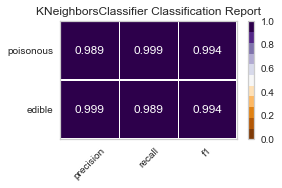

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       843
           1       0.99      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



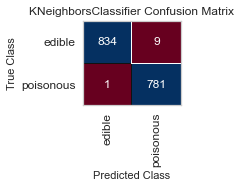

best parameters are: SGDClassifier()


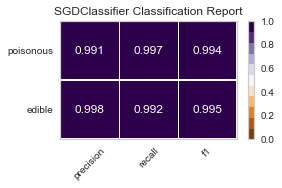

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       843
           1       0.99      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



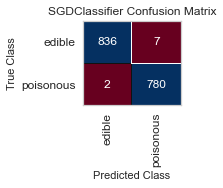

best parameters are: SVC(C=1, degree=1)


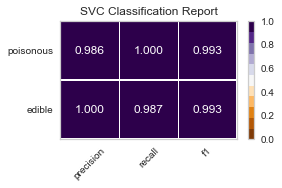

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       843
           1       0.99      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625



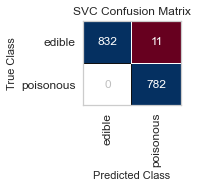

In [261]:
fit_search(X_train5, y_train5, X_test5, y_test5)

In [384]:
%%timeit
rf_covar_model = RandomForestClassifier(criterion='entropy', max_depth=10, n_jobs=-1)
clf_results(rf_covar_model, X_train5, y_train5, X_test5, y_test5)

cv scores: [0.9889065  0.99047619 0.99681021 0.99681021 0.9936407 ]
Train Data Score(jaccard) for RandomForestClassifier(criterion='entropy', max_depth=10, n_jobs=-1) is 0.9969226034774581 
Mean 10 Fold Jaccard Score on Train Data:  0.993328760459022
Test Score for RandomForestClassifier(criterion='entropy', max_depth=10, n_jobs=-1) is 0.9950769230769231 
[[837   6]
 [  2 780]]
              precision    recall  f1-score   support

      edible       1.00      0.99      1.00       843
   poisonous       0.99      1.00      0.99       782

    accuracy                           1.00      1625
   macro avg       0.99      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

cv scores(jaccard): [0.98717949 0.98717949 1.         0.97468354 0.97468354 0.98734177
 0.97435897 0.98717949 1.         0.98734177]
Mean 10 Fold Jaccard Score Test Data:  0.9859948068808828
Cohens Kappa Score=0.990 AUC Score=0.996
cv scores: [0.9889065  0.99047619 0.99681021 0.9984051  0.99

In [385]:
%%timeit
kn_covar_model = KNeighborsClassifier(algorithm='ball_tree', weights='distance')
clf_results(kn_covar_model, X_train5, y_train5, X_test5, y_test5)

cv scores: [0.98732171 0.9872814  0.99047619 0.99365079 0.9872814 ]
Train Data Score(jaccard) for KNeighborsClassifier(algorithm='ball_tree', weights='distance') is 0.9969226034774581 
Mean 10 Fold Jaccard Score on Train Data:  0.9892022987576266
Test Score for KNeighborsClassifier(algorithm='ball_tree', weights='distance') is 0.9938461538461538 
[[834   9]
 [  1 781]]
              precision    recall  f1-score   support

      edible       1.00      0.99      0.99       843
   poisonous       0.99      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

cv scores(jaccard): [0.96153846 0.97435897 1.         0.97468354 0.98734177 1.
 0.98717949 0.97468354 1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.9859785783836417
Cohens Kappa Score=0.988 AUC Score=0.994
cv scores: [0.98732171 0.9872814  0.99047619 0.99365079 0.9872814 ]
Train Dat

In [386]:
%%timeit
svc_covar_model = SVC(C=10, degree=1)
clf_results(svc_covar_model, X_train5, y_train5, X_test5, y_test5)

cv scores: [0.9889065  0.99050633 0.99203822 0.99523052 0.99365079]
Train Data Score(jaccard) for SVC(C=10, degree=1) is 0.9970764733035852 
Mean 10 Fold Jaccard Score on Train Data:  0.9920664723180674
Test Score for SVC(C=10, degree=1) is 0.9944615384615385 
[[836   7]
 [  2 780]]
              precision    recall  f1-score   support

      edible       1.00      0.99      0.99       843
   poisonous       0.99      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

cv scores(jaccard): [0.98717949 0.98717949 1.         0.97468354 0.98734177 1.
 1.         1.         1.         1.        ]
Mean 10 Fold Jaccard Score Test Data:  0.993638429081467
Cohens Kappa Score=0.989 AUC Score=0.995
cv scores: [0.9889065  0.99050633 0.99203822 0.99523052 0.99365079]
Train Data Score(jaccard) for SVC(C=10, degree=1) is 0.9970764733035852 
Mean 10 Fold Jaccard Scor

In [387]:
%%timeit
sgd_covar_model = SGDClassifier()
clf_results(sgd_covar_model, X_train5, y_train5, X_test5, y_test5)

cv scores: [0.99366086 0.97663551 0.97815913 0.97209302 0.97936508]
Train Data Score(jaccard) for SGDClassifier() is 0.9946145560855516 
Mean 10 Fold Jaccard Score on Train Data:  0.9799827197578217
Test Score for SGDClassifier() is 0.992 
[[830  13]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      0.98      0.99       843
   poisonous       0.98      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

cv scores(jaccard): [0.97468354 0.98734177 0.975      0.9875     0.97468354 0.975
 0.98734177 0.94871795 0.96296296 0.975     ]
Mean 10 Fold Jaccard Score Test Data:  0.9748231544592304
Cohens Kappa Score=0.984 AUC Score=0.992
cv scores: [0.977813   0.98732171 0.98430141 0.97209302 0.98253968]
Train Data Score(jaccard) for SGDClassifier() is 0.9932297276504077 
Mean 10 Fold Jaccard Score on Train Data:  0.9

Train Data Score(jaccard) for SGDClassifier() is 0.9946145560855516 
Mean 10 Fold Jaccard Score on Train Data:  0.9815158228960437
Test Score for SGDClassifier() is 0.992 
[[830  13]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      0.98      0.99       843
   poisonous       0.98      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

cv scores(jaccard): [0.96153846 0.98734177 0.98734177 0.96202532 0.98734177 0.96296296
 0.98734177 0.9625     0.98717949 0.975     ]
Mean 10 Fold Jaccard Score Test Data:  0.9760573316744203
Cohens Kappa Score=0.984 AUC Score=0.992
cv scores: [0.99366086 0.98415214 0.98584906 0.99523052 0.98888889]
Train Data Score(jaccard) for SGDClassifier() is 0.9936913371287891 
Mean 10 Fold Jaccard Score on Train Data:  0.9895562930761187
Test Score for SGDClassifier() is 0.99076923076

cv scores(jaccard): [0.98717949 0.92405063 0.98717949 0.92405063 0.98734177 0.975
 0.8974359  0.98734177 0.97468354 0.96296296]
Mean 10 Fold Jaccard Score Test Data:  0.9607226189188216
Cohens Kappa Score=0.989 AUC Score=0.995
cv scores: [0.97305864 0.98732171 0.98888889 0.9796875  0.98888889]
Train Data Score(jaccard) for SGDClassifier() is 0.9898445914756117 
Mean 10 Fold Jaccard Score on Train Data:  0.9835691252861419
Test Score for SGDClassifier() is 0.9852307692307692 
[[819  24]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      0.97      0.99       843
   poisonous       0.97      1.00      0.98       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

cv scores(jaccard): [0.97435897 0.97468354 0.92857143 0.92405063 0.97468354 0.975
 0.98734177 0.98734177 0.96296296 0.975     ]
Mean 10 Fold Jaccard Score Test Data:  0.9

cv scores: [0.9889065  0.98584906 0.98888889 0.99208861 0.97955975]
Train Data Score(jaccard) for SGDClassifier() is 0.9949222957378058 
Mean 10 Fold Jaccard Score on Train Data:  0.9870585598276186
Test Score for SGDClassifier() is 0.9944615384615385 
[[836   7]
 [  2 780]]
              precision    recall  f1-score   support

      edible       1.00      0.99      0.99       843
   poisonous       0.99      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

cv scores(jaccard): [0.97435897 0.96202532 0.93589744 0.94936709 0.975      0.975
 0.96296296 0.97435897 0.94936709 0.975     ]
Mean 10 Fold Jaccard Score Test Data:  0.9633337841249233
Cohens Kappa Score=0.989 AUC Score=0.995
cv scores: [0.98895899 0.98894155 0.98253968 0.98275862 0.99207607]
Train Data Score(jaccard) for SGDClassifier() is 0.9956916448684413 
Mean 10 Fold Jaccard Score on Tra

cv scores(jaccard): [0.95061728 0.97468354 0.98717949 0.94936709 0.97530864 0.975
 0.98734177 0.98734177 0.93975904 0.96296296]
Mean 10 Fold Jaccard Score Test Data:  0.9689561589428145
Cohens Kappa Score=0.984 AUC Score=0.992
cv scores: [0.99052133 0.98430141 0.98275862 0.99046105 0.98730159]
Train Data Score(jaccard) for SGDClassifier() is 0.9909216802585014 
Mean 10 Fold Jaccard Score on Train Data:  0.9870687994325762
Test Score for SGDClassifier() is 0.992 
[[836   7]
 [  6 776]]
              precision    recall  f1-score   support

      edible       0.99      0.99      0.99       843
   poisonous       0.99      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

cv scores(jaccard): [0.95061728 0.92307692 0.975      0.975      0.98734177 0.975
 0.975      0.96153846 0.96153846 0.97435897]
Mean 10 Fold Jaccard Score Test Data:  0.96584718766153

cv scores: [0.99366086 0.97939778 0.98888889 0.9796875  0.98119122]
Train Data Score(jaccard) for SGDClassifier() is 0.9926142483458994 
Mean 10 Fold Jaccard Score on Train Data:  0.984565249708683
Test Score for SGDClassifier() is 0.9901538461538462 
[[827  16]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      0.98      0.99       843
   poisonous       0.98      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

cv scores(jaccard): [0.95061728 0.96202532 0.98717949 0.9625     0.98734177 0.95121951
 0.97435897 0.98734177 0.98717949 0.96296296]
Mean 10 Fold Jaccard Score Test Data:  0.9712726568586145
Cohens Kappa Score=0.980 AUC Score=0.990
cv scores: [0.98415214 0.97305864 0.98275862 0.98582677 0.98119122]
Train Data Score(jaccard) for SGDClassifier() is 0.9944606862594245 
Mean 10 Fold Jaccard Score on

cv scores: [0.99208861 0.9889065  0.98584906 0.99523052 0.97965571]
Train Data Score(jaccard) for SGDClassifier() is 0.9903062009539929 
Mean 10 Fold Jaccard Score on Train Data:  0.9883460797027798
Test Score for SGDClassifier() is 0.992 
[[836   7]
 [  6 776]]
              precision    recall  f1-score   support

      edible       0.99      0.99      0.99       843
   poisonous       0.99      0.99      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

cv scores(jaccard): [0.97468354 0.94936709 0.98717949 0.975      0.97468354 0.975
 0.98734177 0.98717949 0.93975904 0.975     ]
Mean 10 Fold Jaccard Score Test Data:  0.972519395987064
Cohens Kappa Score=0.984 AUC Score=0.994
cv scores: [0.96196513 0.98422713 0.98427673 0.97209302 0.97777778]
Train Data Score(jaccard) for SGDClassifier() is 0.9923065086936452 
Mean 10 Fold Jaccard Score on Train Data:  0.97

cv scores: [0.977813   0.98256735 0.9796875  0.98894155 0.98730159]
Train Data Score(jaccard) for SGDClassifier() is 0.9923065086936452 
Mean 10 Fold Jaccard Score on Train Data:  0.9832621968275547
Test Score for SGDClassifier() is 0.9901538461538462 
[[827  16]
 [  0 782]]
              precision    recall  f1-score   support

      edible       1.00      0.98      0.99       843
   poisonous       0.98      1.00      0.99       782

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

cv scores(jaccard): [0.95061728 0.96202532 0.9625     0.96341463 0.96296296 0.98734177
 0.93589744 0.97468354 0.97468354 0.96153846]
Mean 10 Fold Jaccard Score Test Data:  0.963566495571101
Cohens Kappa Score=0.980 AUC Score=0.990
cv scores: [0.99207607 0.97511664 0.98571429 0.97209302 0.98119122]
Train Data Score(jaccard) for SGDClassifier() is 0.9915371595630097 
Mean 10 Fold Jaccard Score on

Logistic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

RF:
	Brier: 0.002
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

RF + Isotonic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

RF + Sigmoid:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

Logistic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

KN:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

KN + Isotonic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

KN + Sigmoid:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

Logistic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

SGD:
	Brier: 0.062
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

SGD + Isotonic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

SGD + Sigmoid:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

Logistic:
	Brier: 0.000
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

SVC:
	Brier: 0.016
	Precision: 1.000
	Recall: 1.000
	F1: 1.000

SVC + Isotonic:
	Brier: 0.0

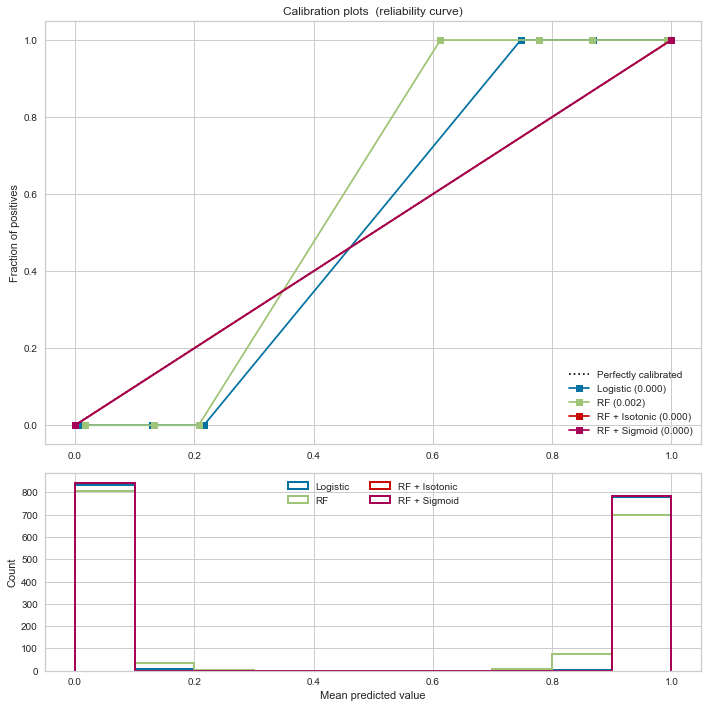

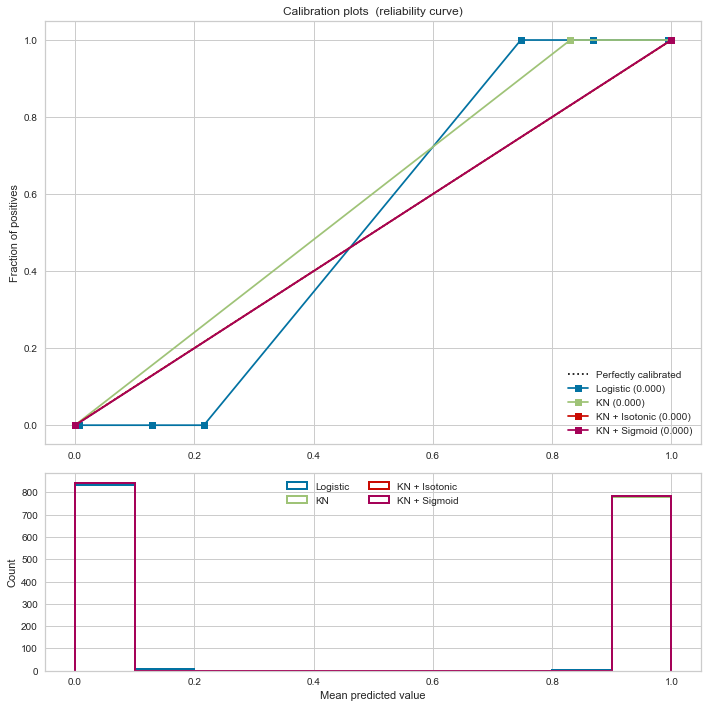

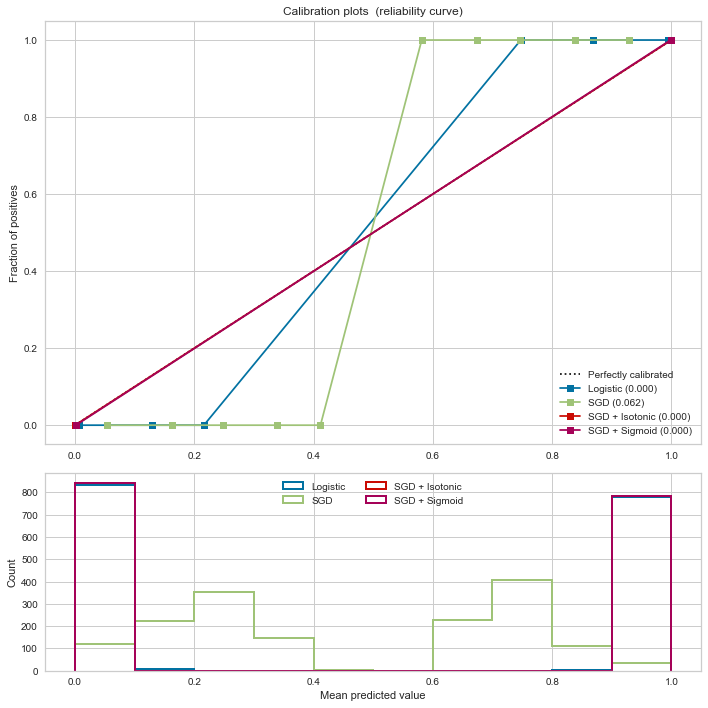

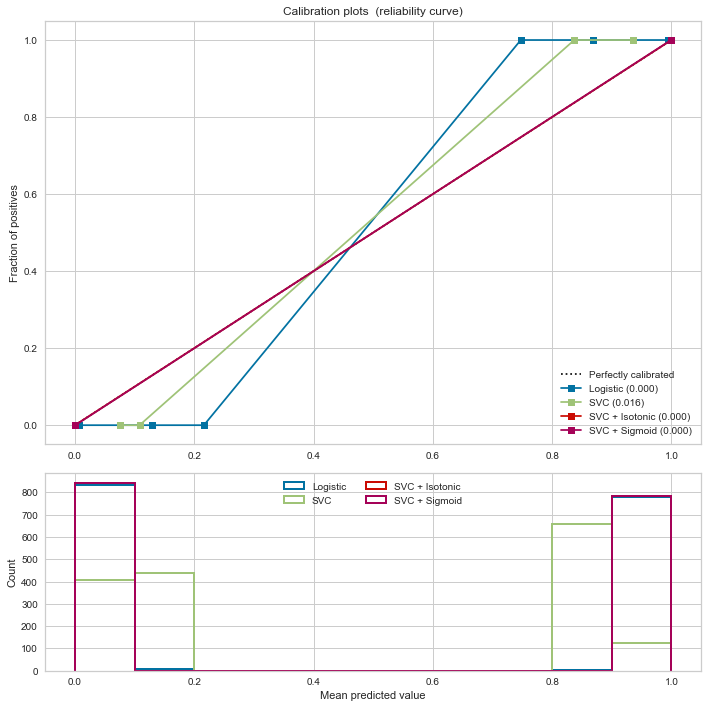

In [406]:
plot_calibration_curve(rf_covar_model, "RF", 1)
plot_calibration_curve(kn_covar_model, "KN", 2)
plot_calibration_curve(sgd_covar_model, "SGD", 3)
plot_calibration_curve(svc_covar_model, "SVC", 4)